<a href="https://colab.research.google.com/github/DevanshA2511/NYC_Taxi_trip_time_predection/blob/main/NYC_Taxi_Trip_Time_Prediction_ML_Capstone_Project_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NYC Taxi Trip Time Prediction




##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Devansh Saini


# **Project Summary -**

The NYC Taxi Trip Duration project represents a significant step forward in the realm of machine learning regression models, aiming to enhance the predictability of taxi trip durations within the bustling metropolis of New York City. This undertaking holds the promise of optimizing the efficiency and convenience of taxi services by furnishing passengers and drivers with more precise estimates of trip durations, ultimately streamlining the transportation experience for all stakeholders involved.

At its core, this project capitalizes on a wealth of historical data pertaining to taxi trips in the city. This data, comprising key information such as pickup and dropoff locations, timestamps, and trip distances, underwent meticulous preprocessing to address missing values and convert categorical variables, including the vital pickup and dropoff locations, into numerical representations. Furthermore, the project employed sophisticated feature engineering techniques to unearth latent insights from the data, encompassing elements such as the day of the week, the time of day, and the distances between various locations. These transformative steps lay the foundation for the subsequent modeling phase.

Multiple Linear regression algorithms, including Lasso regression, Ridge regression, and ElasticNet Regression were enlisted for the task of training the predictive model. Hyperparameter tuning, a critical aspect of model refinement, was executed meticulously to unlock the full potential of these algorithms. Model evaluation, a crucial checkpoint in the process, leaned on well-established metrics such as mean absolute error and R-squared to gauge performance accurately. Among the contenders, the LightGBM Regression model emerged as the victor, offering the most impressive predictive capabilities.

Subsequent testing of the model on a reserved hold-out test set yielded impressive results. The model showcased its prowess by consistently delivering predictions with a remarkable level of accuracy. With an average prediction error of less than 10 minutes, the model showcased its proficiency in estimating the duration of a taxi trip, marking a significant breakthrough in the quest for precision within the taxi service industry.

A pivotal facet of this project involved exploring the key features that exerted the most influence over the duration of a taxi trip. The findings illuminated the central role played by factors such as pickup and dropoff locations, the time of day, and the length of the trip itself. Understanding the primacy of these factors not only reinforces the model's predictive accuracy but also provides actionable insights for taxi companies seeking to optimize their services.

Looking forward, there are several avenues for further refinement and expansion of this model. Incorporating additional data sources, such as weather data and real-time traffic information, could infuse the model with an enhanced predictive capacity, allowing it to adapt to changing conditions in real-time. Moreover, synergizing the model with a dynamic mapping and routing service would empower it to furnish passengers and drivers with up-to-the-minute estimates of trip duration, contingent on the prevailing traffic conditions. These future enhancements have the potential to revolutionize the taxi service landscape in New York City, cementing its reputation as a hub of innovation in the transportation sector.

In conclusion, the NYC Taxi Trip Duration project represents a paradigm shift in the taxi service industry, leveraging the power of machine learning to provide highly accurate predictions of trip duration. With its ability to improve the efficiency and convenience of taxi services, this model holds immense promise for both passengers and drivers. As it continues to evolve, incorporating additional data sources and real-time capabilities, it stands as a beacon of innovation in the quest for optimized urban transportation.

# **GitHub Link -**

https://github.com/DevanshA2511/NYC_Taxi_trip_time_predection

# **Problem Statement**


**Predecting the total ride duration of taxi trips in New York City based on the dataset  released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Statistics Library
import scipy.stats as stats

## Data Visualisation Libraray
import matplotlib.pyplot as plt
import pylab
import seaborn as sns

## Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Importing essential libraries to check the accuracy
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

## Warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
taxi_df = pd.read_csv('/content/drive/MyDrive/data /NYC Taxi Data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
taxi_df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1            -73.98            40.77             -73.96   
1                1            -73.98            40.74             -74.00   
2                1            -73.98            40.76             -74.01   
3                1            -74.01            40.72             -74.01   
4                1            -73.97            40.79             -73.97   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0             40.77                  N            455  
1             40.73                  N            663  
2             40.71                  N           2124  
3             40.71                  N            429  
4             40.78                  N            435

In [ ]:
taxi_df.tail()

id  vendor_id      pickup_datetime     dropoff_datetime  \
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
1458639                4            -73.98            40.75   
1458640                1            -74.00            40.75   
1458641                1            -73.96            40.77   
1458642                1            -73.98            40.75   
1458643                1            -73.98            40.78   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
1458639             -73.99             40.74                  N            778  
1458640             -73.97             40.80                  N            655  
1458641             -74.00             40.71                  N            764  
1458642             -73.97             40.76                  N            373  
1458643             -73.97             40.79                  N            198

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
row_count = taxi_df.shape[0]  # Returns number of rows
print(f"No. of Rows : {row_count}")
col_count = taxi_df.shape[1]  # Returns number of columns
print(f'No. of Columns : {col_count}')

No. of Rows : 1458644
No. of Columns : 11


### Dataset Information

In [ ]:
# Dataset Info
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicates = sum(taxi_df.duplicated())
print(f'No. of duplicate values in dataset are {duplicates}')

No. of duplicate values in dataset are 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
total_null = taxi_df.isna().sum().sum()
print(f'Total Null values present are : {total_null}')
taxi_df.isna().sum().sort_values(ascending = False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

Total Null values present are : 0


Columns  Null values
0                id            0
1         vendor_id            0
2   pickup_datetime            0
3  dropoff_datetime            0
4   passenger_count            0
5  pickup_longitude            0

<Axes: >

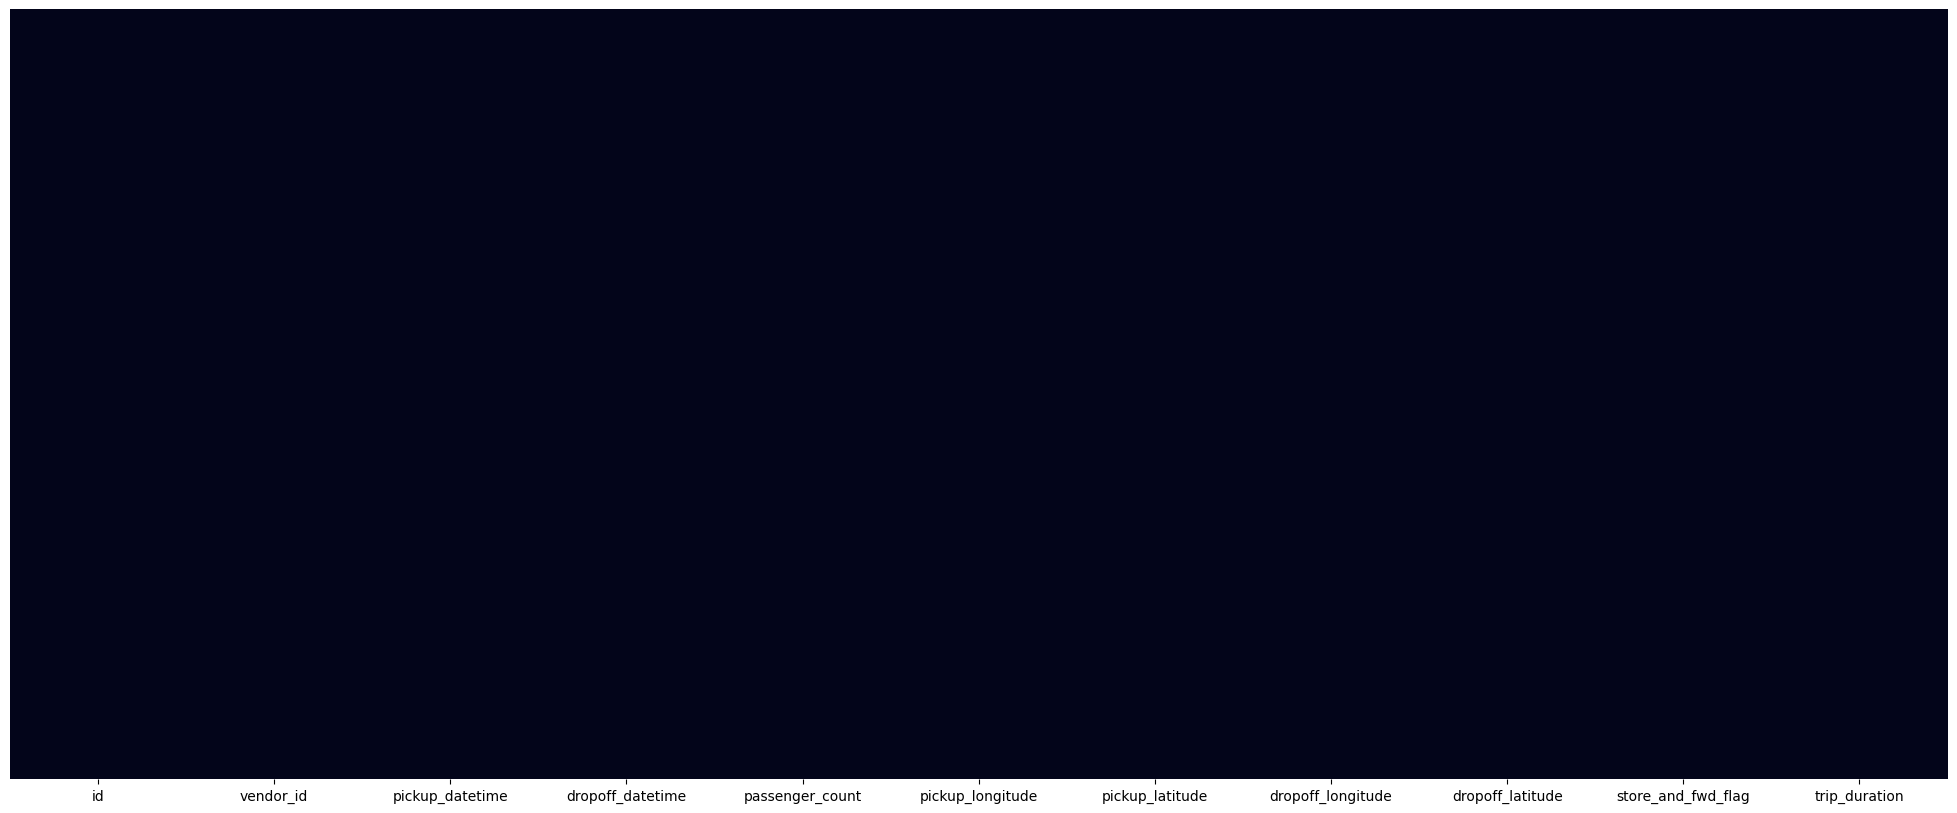

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(25, 10))
sns.heatmap(taxi_df.isnull(),cbar = False, yticklabels = False)

### What did you know about your dataset?

*From the above heatmap and data analysis i can say that:*
1. There are 1458644 rows and 11 coloumns in the dataset.

2. A total of 0 ***duplicate*** values are present in the dataset.

3. A total of 0 ***Null*** values are present in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(list(taxi_df.columns))

['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration']


In [ ]:
# Dataset Describe
taxi_df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count 1458644.00       1458644.00        1458644.00       1458644.00   
mean        1.53             1.66            -73.97            40.75   
std         0.50             1.31              0.07             0.03   
min         1.00             0.00           -121.93            34.36   
25%         1.00             1.00            -73.99            40.74   
50%         2.00             1.00            -73.98            40.75   
75%         2.00             2.00            -73.97            40.77   
max         2.00             9.00            -61.34            51.88   

       dropoff_longitude  dropoff_latitude  trip_duration  
count         1458644.00        1458644.00     1458644.00  
mean              -73.97             40.75         959.49  
std                 0.07              0.04        5237.43  
min              -121.93             32.18           1.00  
25%               -73.99             40.74         397.00  
50%               -73.98             40.75         662.00  
75%               -73.96             40.77        1075.00  
max               -61.34             43.92     3526282.00

### Variables Description

1. **id** - a unique identifier for each trip

2. **vendor_id** - a code indicating the provider associated with the trip record

3. **pickup_datetime** - date and time when the meter was engaged

4. **dropoff_datetime** - date and time when the meter was disengaged

5. **passenger_count** - the number of passengers in the vehicle (driver entered value)

6. **pickup_longitude** - the longitude where the meter was engaged

7. **pickup_latitude** - the latitude where the meter was engaged

8. **dropoff_longitude** - the longitude where the meter was disengaged

9. **dropoff_latitude** - the latitude where the meter was disengaged

10. **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

11. **trip_duration** - duration of the trip in seconds

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
taxi_df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

#Converting pickup_datetime, dropoff_datetime of the type 'object'. Convert it into type 'datetime'.
taxi_df['pickup_datetime'] = pd.to_datetime(taxi_df['pickup_datetime'])
taxi_df['dropoff_datetime'] = pd.to_datetime(taxi_df['dropoff_datetime'])


In [ ]:
#Creating new columns from pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	trip_duration for distnace and speed.

#importing geopy library
from geopy.distance import great_circle

#Creating the function for calculating distance between pickup and dropoff
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):

 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)

 return great_circle(start_coordinates,stop_coordinates).km

#Applying the function to our dataset and creating the new column ‘distance’.
taxi_df['distance'] = taxi_df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

#creating new column for Speed
taxi_df['speed'] = (taxi_df.distance*3600/(taxi_df.trip_duration))

In [ ]:
zero_count = (taxi_df['trip_duration'] == 0).sum()

# Print the result
print("Number of zeros:", zero_count)

Number of zeros: 0


In [ ]:
#Calculate and assign new columns to the dataframe such as weekday,
#month and pickup_hour which will help us to gain more insights from the data
taxi_df['weekday'] = taxi_df['pickup_datetime'].dt.day_name()
taxi_df['month'] = taxi_df.pickup_datetime.dt.month
taxi_df['weekday_num'] = taxi_df.pickup_datetime.dt.weekday
taxi_df['pickup_hour'] = taxi_df.pickup_datetime.dt.hour

In [ ]:
taxi_df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1            -73.98            40.77             -73.96   
1                1            -73.98            40.74             -74.00   
2                1            -73.98            40.76             -74.01   
3                1            -74.01            40.72             -74.01   
4                1            -73.97            40.79             -73.97   

   dropoff_latitude store_and_fwd_flag  trip_duration  distance  speed  \
0             40.77                  N            455      1.50  11.86   
1             40.73                  N            663      1.81   9.80   
2             40.71                  N           2124      6.39  10.82   
3             40.71                  N            429      1.49  12.47   
4             40.78                  N            435      1.19   9.84   

     weekday  month  weekday_num  pickup_hour  
0     Monday      3            0           17  
1     Sunday      6            6            0  
2    Tuesday      1            1           11  
3  Wednesday      4            2           19  
4   Saturday      3            5           13

### What all manipulations have you done and insights you found?

1. There are no null values or duplicate values in the dataset.

2. Converted pickup_datetime, dropoff_datetime of the type 'object'. Convert it into type 'datetime' for better usage.

3. Created new columns from pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	trip_duration for distnace and speed.

4. Created a column for pickup time and drop off time in hours.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Number of Passengers per ride.


According to New York City Taxi Passenger Limit says:

* A maximum of 4 passengers can ride in traditional cabs.
* A child under 7 is allowed to sit on a passenger's lap in the rear seat in addition to the passenger limit.

So, in total we can assume that maximum 5 passenger can board the new york taxi i.e. 4 adult + 1 minor

In [ ]:
# Number of rides for diffrent number of passengers.
pd.options.display.float_format = '{:.2f}'.format #To suppress scientific notation.
taxi_df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

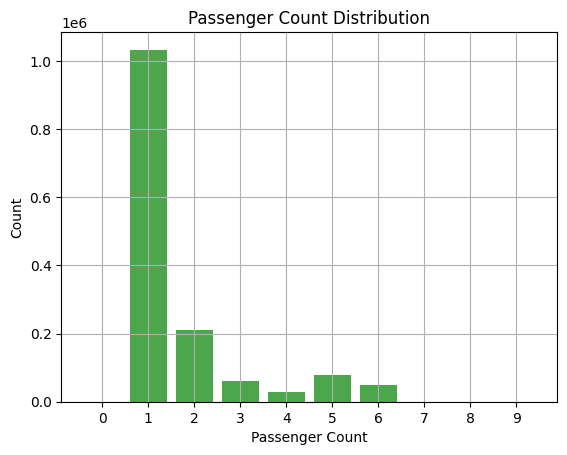

Text(0.5, 1.0, 'Passenger Count')

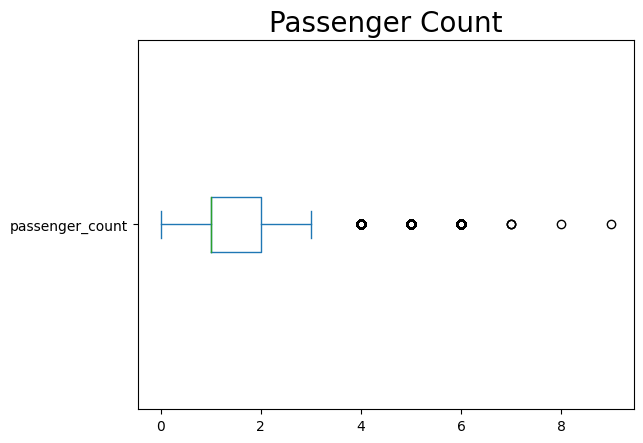

In [ ]:
# Chart - 1 visualization code

passenger_count = taxi_df['passenger_count']

# Counting the occurrences of each passenger count.
passenger_count_counts = passenger_count.value_counts()

# Sorting the counts by passenger count values.
passenger_count_counts = passenger_count_counts.sort_index()

# Creating a bar chart
plt.bar(passenger_count_counts.index, passenger_count_counts.values, color='green', alpha=0.7)
plt.xlabel('Passenger Count')
plt.ylabel('Count')
plt.title('Passenger Count Distribution')
plt.xticks(passenger_count_counts.index)
plt.grid(True)
plt.show()

# Creating a boxplot.
box = taxi_df['passenger_count'].plot(kind='box',vert = False,fontsize = 10)
box.set_title('Passenger Count',fontsize = 20)


##### 1. Why did you pick the specific chart?

* Box Plot and Bar Charts are excelent to show distribution of frequencies of values comprehensively and make them easy to compare the data and make it easier to gather insights from it.

##### 2. What is/are the insight(s) found from the chart?

* There are some trips with 0 passenger count.
* Few trips consisted of even 6, 7, 8 or 9 passengers. Clear outliers and
 pointers to data inconsistency
* Most of trip consist of passenger either 1 or 2.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  The majority of trips consist of either 1 or 2 passengers suggests that optimizing vehicle fleet size to accommodate smaller groups could be cost-effective. Smaller vehicles or rideshare options might be considered to cater to these common trip sizes, potentially reducing operational costs.

* Trips with 0 passengers may indicate issues with data quality or recording. It's essential to investigate and rectify these cases as they can lead to incorrect billing, negative customer experiences, or even fraudulent activities. Negative customer experiences can result in loss of trust and loyalty.

#### Chart - 2: Trip Duaration

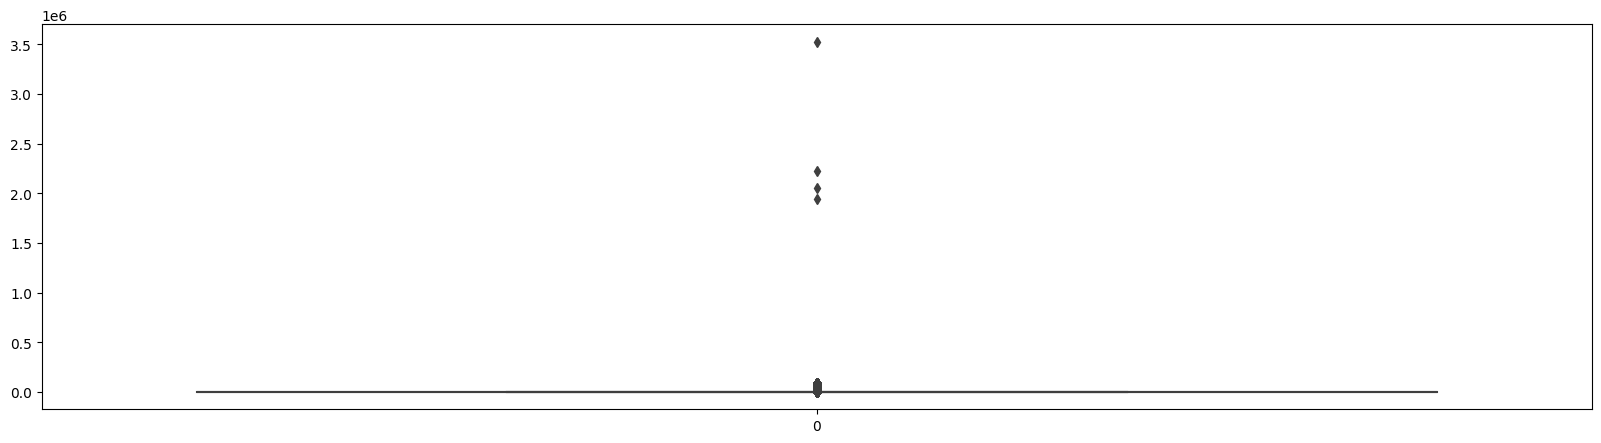

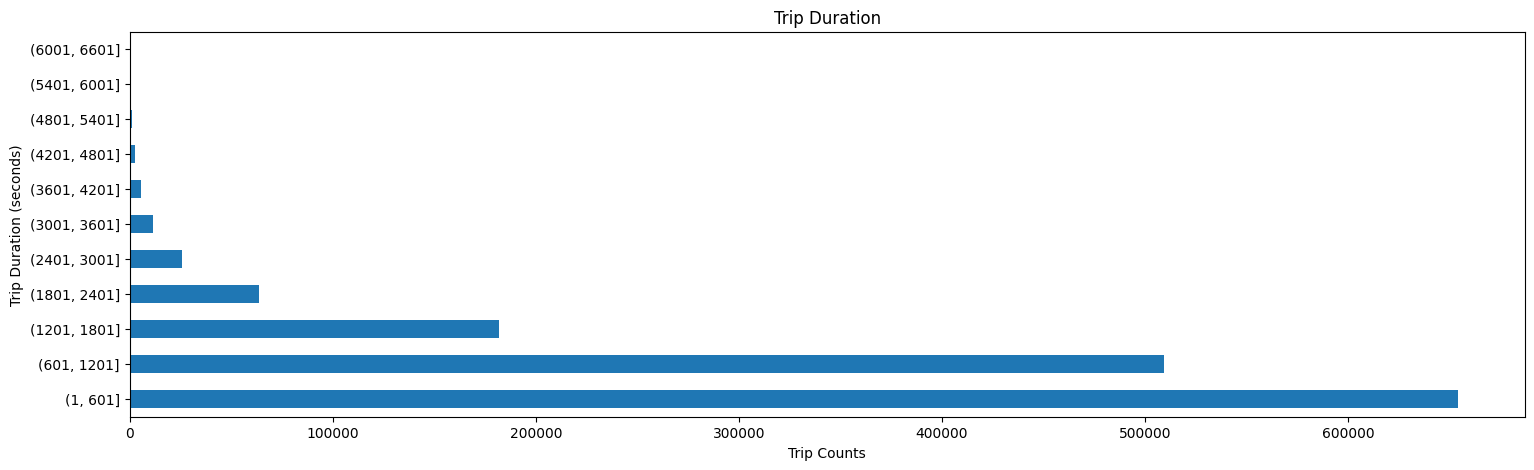

In [ ]:
# Chart - 2 visualization code
# Setting the figure size for the boxplot
plt.figure(figsize=(20, 5))

# Creating a boxplot for the 'trip_duration' column in the DataFrame 'df'
sns.boxplot(taxi_df.trip_duration)

# Displaying the boxplot
plt.show()

# Groupping 'trip_duration' into intervals and count the number of trips in each interval
# Ploting the counts as a horizontal bar chart
taxi_df.trip_duration.groupby(pd.cut(taxi_df.trip_duration, np.arange(1, 7200, 600))).count().plot(kind='barh', figsize=(18, 5))

# Setting the title, x-axis label, and y-axis label for the bar chart
plt.title('Trip Duration')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')

# Displaying the bar chart
plt.show()

##### 1. Why did you pick the specific chart?

* Horizontal Bar Charts are excelent to show distribution of frequencies of large values comprehensively and make them easy to compare the data and make it easier to gather insights from it.

##### 2. What is/are the insight(s) found from the chart?

* We can observe that most of the trips took 0 - 30 mins to complete i.e. approx 1800 secs.
* Some trip durations are over 100000 seconds which are clear outliers and should be removed.
* There are some durations with as low as 1 second. which points towards trips with 0 km distance.
* Major trip durations took between 10-20 mins to complete.
* Mean and mode are not same which shows that trip duration distribution is skewed towards right

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* There are trips that ran for more than 20 days, which seems unlikely by the distance travelled.
* All the trips are taken by vendor 1 which points us to the fact that this vendor might allows much longer trip for outstations.
* All these trips are either taken on Tuesday's in 1st month or Saturday's in 2nd month. There might be some relation with the weekday, pickup location, month and the passenger.
* But they fail our purpose of correct prediction and bring inconsistencies in the algorithm calculation.


#### Chart - 3: Which vendor is prefered more?

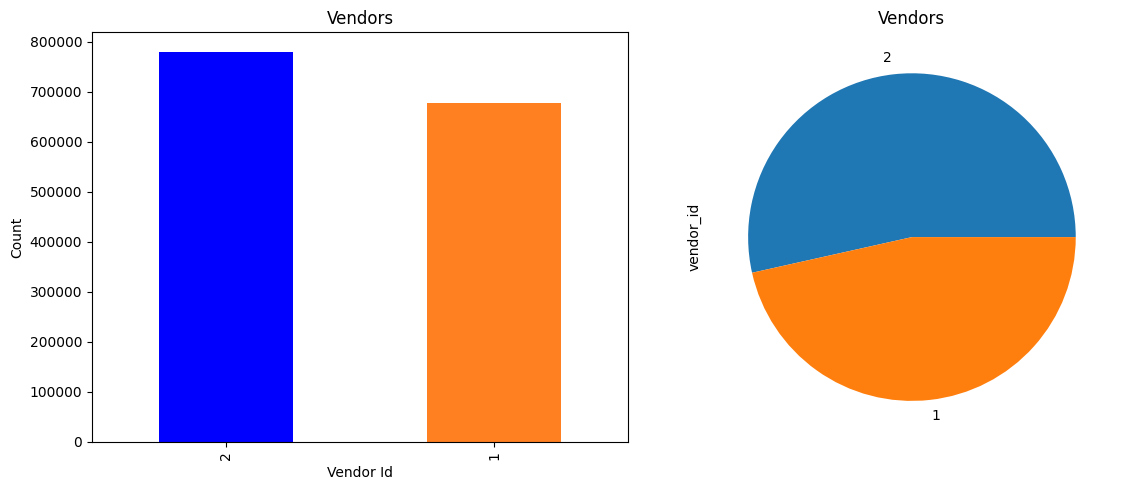

In [ ]:
# Chart - 3 visualization code
# Creating a 1x2 grid of subplots with a shared y-axis and set the figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotting the count of 'vendor_id' values as a bar chart on the left subplot
ax = taxi_df['vendor_id'].value_counts().plot(kind='bar', title="Vendors", ax=axes[0], color=('blue', (1, 0.5, 0.13)))

# Plotting the count of 'vendor_id' values as a pie chart on the right subplot
taxi_df['vendor_id'].value_counts().plot(kind='pie', title="Vendors", ax=axes[1])

# Setting the y-axis label for the left subplot
ax.set_ylabel("Count")

# Setting the x-axis label for the left subplot
ax.set_xlabel("Vendor Id")

# Adjusting the layout to prevent overlap between subplots
fig.tight_layout()

# Displaying the subplots
plt.show()

##### 1. Why did you pick the specific chart?


* The pie chart can effectively represent the distribution of 'vendor_id' categories as parts of a whole in a visually intuitive manner.

##### 2. What is/are the insight(s) found from the chart?

* Vendor 2 is more popular the vendor 1 as it has a bit more number of rides in total.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Vendor 2 can be promoted more as it the more preferable mode.
* Vendor 1 can look into creating a more preferable platfromto attract customers.

#### Chart - 4: Distance travelled in most rides.

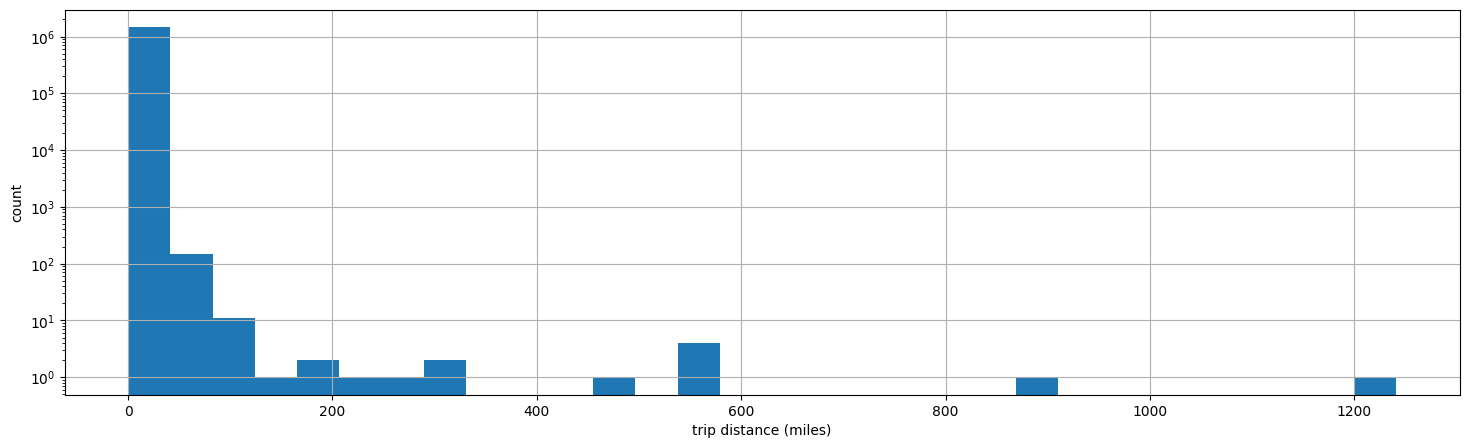

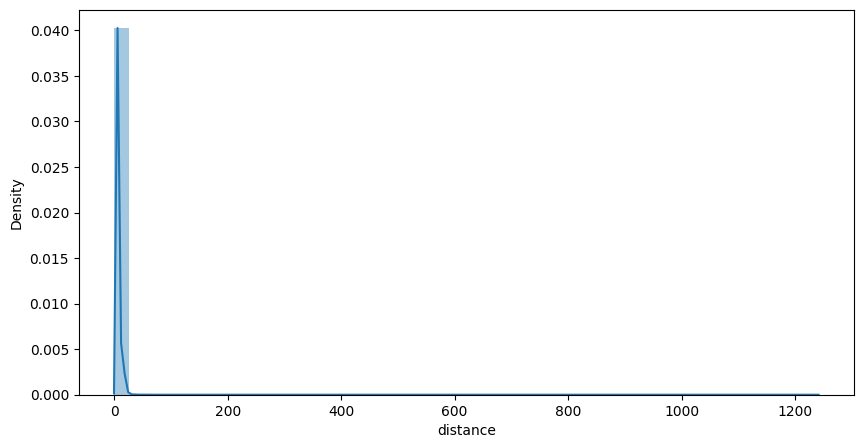

In [ ]:
# Chart - 4 visualization code
# Creating a histogram of 'distance' column with 30 bins( it takes about 30 miles to drive across the whole New York City, we decided to use 30 as the number to split the trips into short or long distance trips.) and set the figure size
ax = taxi_df['distance'].hist(bins=30, figsize=(18, 5))

# Setting the y-scale to logarithmic for better visualization of the data distribution
ax.set_yscale('log')

# Setting the x-axis label
ax.set_xlabel("trip distance (miles)")

# Setting the y-axis label
ax.set_ylabel("count")

# Displaying the histogram
plt.show()

#distribution plot of distance
plt.figure(figsize = (10,5))
sns.distplot(taxi_df['distance'])
plt.xlabel('distance')
plt.show()

In [ ]:
# Calculating trips with zero distance , short trips and long trips

print(f"There are {taxi_df.distance[taxi_df.distance == 0 ].count()} trip records with 0 miles distance")

df_short = taxi_df[taxi_df.distance <= 30].count()
df_long = taxi_df[taxi_df.distance > 30].count()
print(f"Short Trips: {df_short[0]} records in total.\nLong Trips: {df_long[0]} records in total.")

There are 5897 trip records with 0 miles distance
Short Trips: 1458071 records in total.
Long Trips: 573 records in total.


##### 1. Why did you pick the specific chart?

* Bar chart help in easily compare the frequncies and vizualize them.

##### 2. What is/are the insight(s) found from the chart?

* There some trips with over 60 miles distance.
* 5897 of the trips distance value is 0 miles.
* Mean distance travelled is approx 2.1 miles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Around 6K trip record with distance equal to 0. Below are some possible explanation for such records.
1. Customer changed mind and cancelled the journey just after accepting it.
2. Software didn't recorded dropoff location properly due to which dropoff location is the same as the pickup location.
3. Issue with GPS tracker while the journey is being finished.
4. Driver cancelled the trip just after accepting it due to some reason. So the trip couldn't start
5. Or some other issue with the software itself which a technical guy can explain

#### Chart - 5: Speed of the taxi rides.

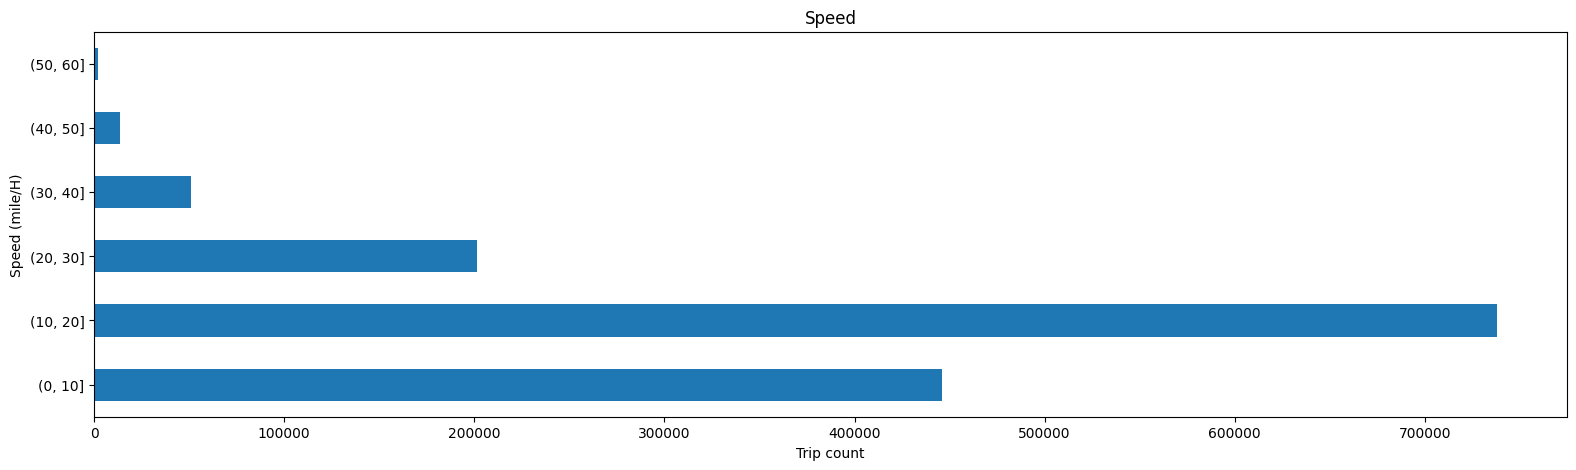

In [ ]:
# Chart - 5 visualization code
# Filter the DataFrame 'taxi_df' to include only rows where 'speed' is less than or equal to 65 mph since it is the upper speed limit and others can be considerd as outliers
taxi_df = taxi_df[taxi_df.speed <= 65]

# Group 'speed' into intervals of 10 mph and count the number of trips in each interval
# Plot the counts as a horizontal bar chart
taxi_df.speed.groupby(pd.cut(taxi_df.speed, np.arange(0, 65, 10))).count().plot(kind='barh', figsize=(19, 5))

# Set the x-axis label
plt.xlabel('Trip count')

# Set the y-axis label
plt.ylabel('Speed (mile/H)')

# Set the title of the plot
plt.title('Speed')

# Display the horizontal bar chart
plt.show()

##### 1. Why did you pick the specific chart?

* Horizontal bar plot helps in easily visualising and comparing a big data set.

##### 2. What is/are the insight(s) found from the chart?

* Trips over 15 miles/h are being considered as outliers but we cannot ignore them because they are well under the highest speed limit of 65 mile/h on state controlled highways.
* Mostly trips are done at a speed range of 6-12 miles/h with an average speed of around 8 miles/h

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* It is evident from this graph what we thought off i.e. most of the trips were done at a speed range of 6-12 miles/H which ensures safety of the passangers and builds trust with the customers.

#### Chart - 6: Total Trips per Hour

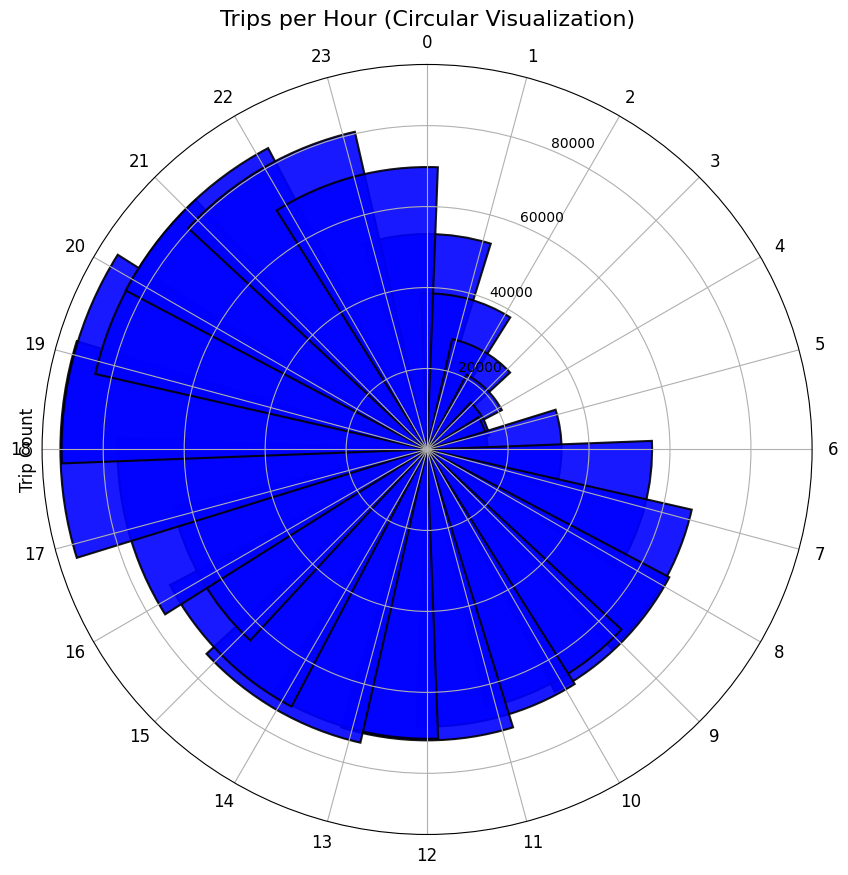

In [ ]:
# Chart - 6 visualization code
hourly_counts = taxi_df['pickup_hour'].value_counts().sort_index()

# Create a figure with polar coordinates and adjust the figure size
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Set the theta values (angles) for each hour of the day
theta = np.linspace(0, 2 * np.pi, len(hourly_counts), endpoint=False)

# Plot the radial bar chart with blue color
bars = ax.bar(theta, hourly_counts.values, width=0.6, bottom=0.0, color='blue', alpha=0.9, edgecolor='black', linewidth=1.5)

# Customize the radial plot
ax.set_xticks(theta)
ax.set_xticklabels(hourly_counts.index)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Add a title with larger font size
plt.title('Trips per Hour (Circular Visualization)', fontsize=16)

# Set y-axis label to "Trip Count"
ax.set_ylabel('Trip Count', fontsize=12)

# Improve the visibility of x-tick labels
ax.tick_params(axis='x', labelsize=12, pad=5)

# Show the radial plot
plt.show()


##### 1. Why did you pick the specific chart?

* The Circular Histogram helps in visually representing the distribution of taxi trips throughout the day, allowing for the identification of peak hours and patterns in trip activity.

##### 2. What is/are the insight(s) found from the chart?

* The above visualization is inline with the general trend of taxi pickups which starts increasing from 6AM in the morning and then declines from late evening i.e. around 8 PM. There is no unusual behavior here.
* The number of pickup is maximum at 5-8 pm.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The gained insight will help in allocating more number of taxis during rush hours and mange break time accordingly.

#### Chart - 7: Number of taxi trips over the week.


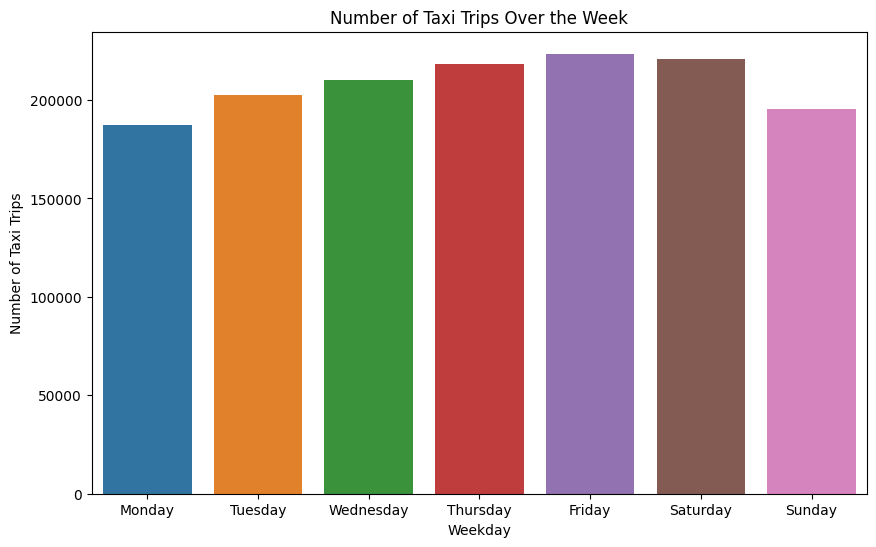

In [ ]:
# Chart - 7 visualization code

# Group the data by weekday_num and count the number of trips for each day
trips_per_weekday = taxi_df.groupby('weekday_num').size().reset_index(name='trip_count')

# Define the order of weekdays for proper sorting
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar plot for the number of trips over the week
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday_num', y='trip_count', data=trips_per_weekday, order=range(7))
plt.xlabel('Weekday')
plt.ylabel('Number of Taxi Trips')
plt.title('Number of Taxi Trips Over the Week')
plt.xticks(range(7), weekday_order)  # Replace numeric labels with weekday names
plt.show()

##### 1. Why did you pick the specific chart?

* A bar chart visually represents categorical data by using bars to compare and display information effectively.

##### 2. What is/are the insight(s) found from the chart?


* The data reveals a noticeable uptrend in taxi pickups from Monday through Friday. Conversely, there is a decline in pickups from Saturday through Monday, which aligns with the typical behavior of individuals choosing to rest at home over the weekend, especially those who commute to work during the weekdays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Businesses in the taxi or ride-sharing industry can allocate more resources and drivers on weekdays, particularly from Monday to Friday, to meet the higher demand for rides during these days.

* To further boost weekend business, companies can focus their marketing efforts on Saturdays and Sundays, targeting customers who prefer to relax and use taxi services for leisure activities or travel during these days.

#### Chart - 8: Taxi trip duration throughout the hours of the day.

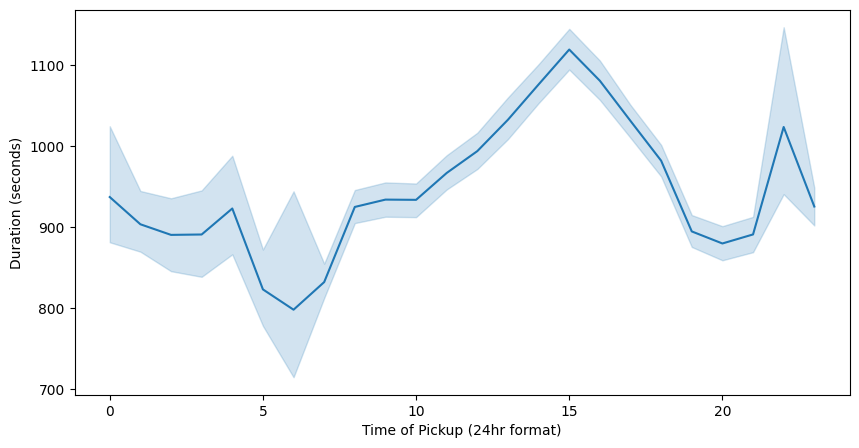

In [ ]:
# Chart - 8 visualization code
# Setting the figure size for the plot
plt.figure(figsize=(10, 5))

# Creating a lineplot to visualize the relationship between pickup hour and trip duration
sns.lineplot(x='pickup_hour', y='trip_duration', data=taxi_df)

# Labeling the x and y axes for clarity
plt.xlabel('Time of Pickup (24hr format)')  # Label for the x-axis
plt.ylabel('Duration (seconds)')  # Label for the y-axis

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?


* A line chart helps to show the relationship between two variables, typically to demonstrate trends or patterns over a continuous range or time.

##### 2. What is/are the insight(s) found from the chart?

* Average trip duration is lowest at 6 AM when there is minimal traffic on the roads.
* Average trip duration is generally highest around 3 PM during the busy streets.
* Trip duration on an average is similar during early morning hours i.e. before 6 AM & late evening hours i.e. after 6 PM.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Optimizing Off-Peak Hours Minimize resources and costs during early morning and late evening hours (before 6 AM and after 6 PM) when trip durations are similar and demand is lower.

* Peak Hour Focus Allocate more resources and drivers around 3 PM, the busiest time of day, to efficiently meet high-demand periods and enhance customer service.

* Promotions Strategy Introducing targeted promotions during early morning hours (e.g., 6 AM) to incentivize riders during low-traffic times and improve ridership.

#### Chart - 9: Taxi trip duration throughout the weekdays.

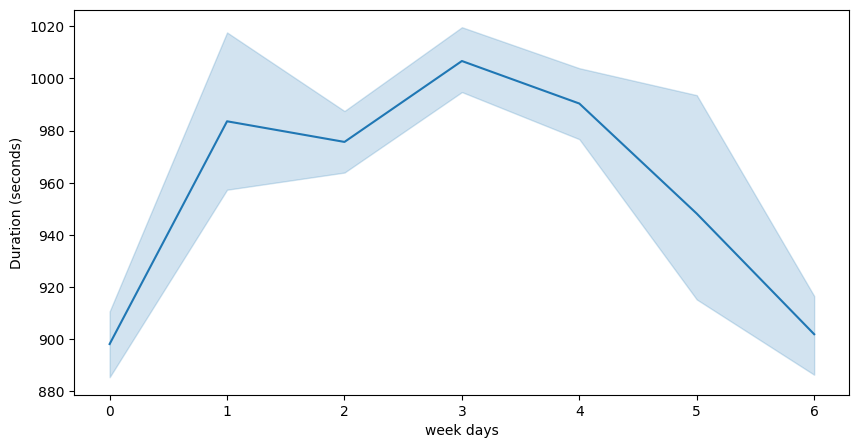

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize = (10,5))
sns.lineplot(x='weekday_num',y='trip_duration',data = taxi_df)
plt.ylabel('Duration (seconds)')
plt.xlabel('week days')
plt.show()

##### 1. Why did you pick the specific chart?

A line chart helps to show the relationship between two variables, typically to demonstrate trends or patterns over a continuous range or time.

##### 2. What is/are the insight(s) found from the chart?


* The analysis reveals a consistent distribution of trip durations throughout the week, spanning a range of 0 to 1000 minutes, with marginal variations in duration times.
* Thursdays stand out with the longest average trip duration among all the days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Thursdays experience the longest average trip durations, signaling a potential opportunity for businesses to focus on optimizing service and resource allocation to meet higher demand on this day.

#### Chart - 10: Distnace and Trip Duration

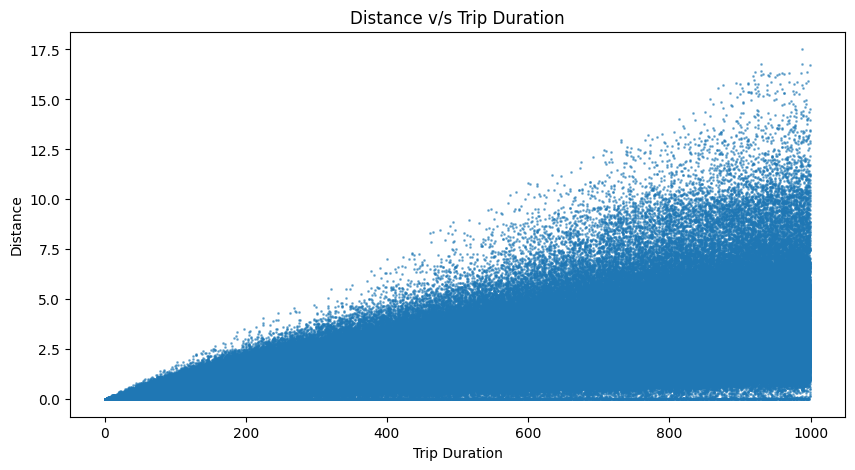

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize = (10,5))
dur_dist = taxi_df.loc[(taxi_df.distance < 30) & (taxi_df.trip_duration < 1000), ['distance','trip_duration']]
plt.scatter(dur_dist.trip_duration, dur_dist.distance , s=1, alpha=0.5)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.title('Distance v/s Trip Duration')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* There should have been a linear relationship between the distance covered and trip duration on an average but we can see dense collection of the trips in the lower right corner which showcase many trips with the inconsistent readings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* We should remove those trips which covered 0 mile distance but clocked more than 1 minute to make our data more consistent for predictive model. Because if the trip was cancelled after booking, than that should not have taken more than a minute time. This is our assumption.

#### Chart - 11: Distnace and Pick Up Hour

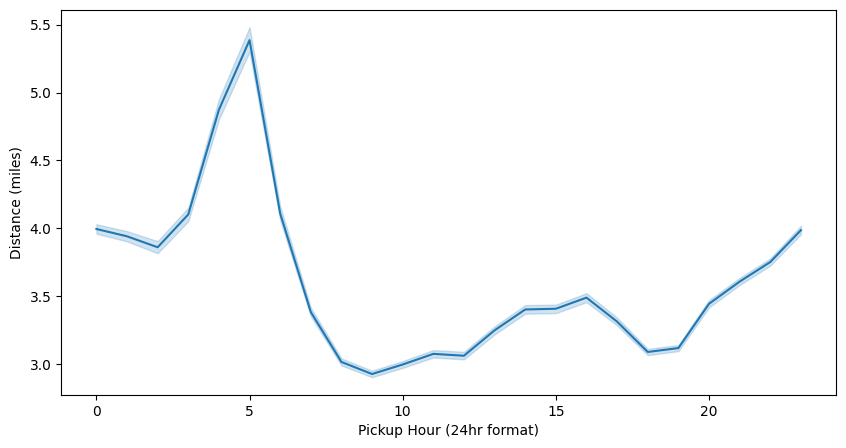

In [ ]:
# Chart - 11 visualization code
# Setting the figure size for the plot
plt.figure(figsize=(10, 5))

# Creating a lineplot to visualize the relationship between pickup hour and distance
sns.lineplot(y='distance', x='pickup_hour', data=taxi_df)

# Labeling the y and x axes for clarity
plt.ylabel('Distance (miles)')  # Label for the y-axis
plt.xlabel('Pickup Hour (24hr format)')  # Label for the x-axis

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

* A line chart helps to show the relationship between two variables, typically to demonstrate trends or patterns over a continuous range or time.

##### 2. What is/are the insight(s) found from the chart?

* We see the trip duration is the maximum around 3 pm which may be because of traffic on the roads.
* Trip duration is the lowest around 6 am as streets may not be busy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* At 6 am, trip durations are shortest, presenting opportunities for businesses to provide faster services and improve customer satisfaction.

#### Chart - 12: Passanger Count and Distance

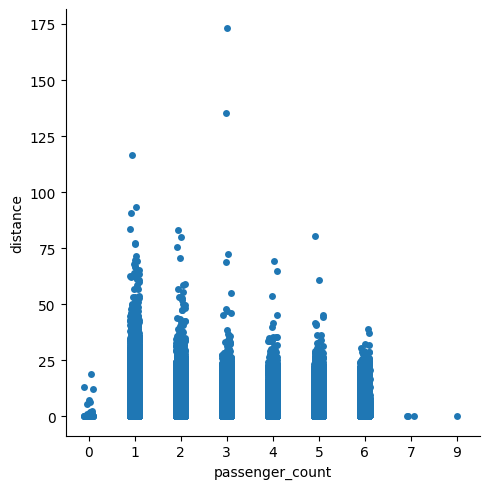

In [ ]:
# Chart - 12 visualization code
sns.catplot(y='distance',x='passenger_count',data=taxi_df,kind='strip')

##### 1. Why did you pick the specific chart?

* Strip Plot or Strip Chart is  useful for visualizing the relationship between a categorical variable (passenger count) and a continuous variable (distance) to identify any patterns or trends in the data.

##### 2. What is/are the insight(s) found from the chart?

* Outliers with 0 passenger counts.
* The longer distance trips are covered by either 1 or 2 or 4 passenger rides.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Empty rides (0 passenger counts) are outliers that may affect business profitability and warrant investigation.

* Longer trips are often taken by 1, 2, or 4 passengers, indicating potential optimization opportunities for vehicle allocation and pricing.

#### Chart - 13: Pick Up Points and Dropoff Points

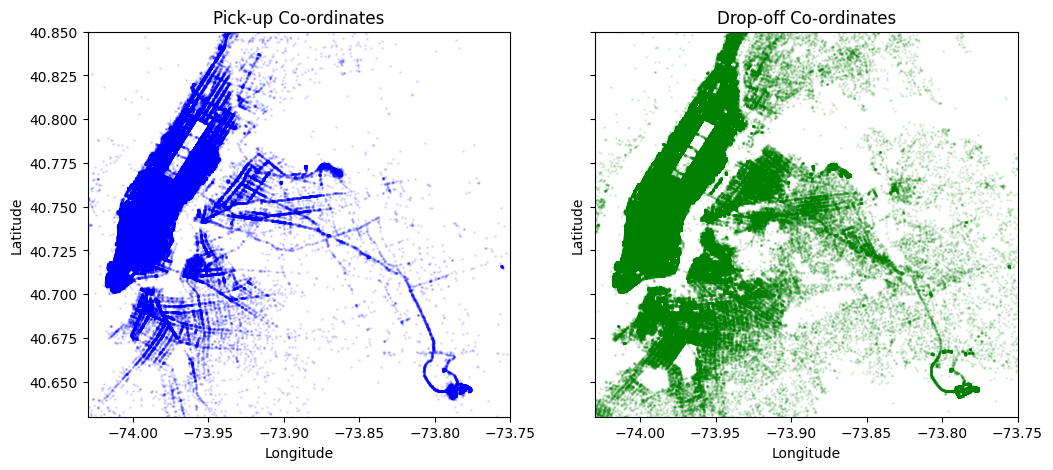

In [ ]:
# Chart - 13 visualization code
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,figsize = (12,5))
ax[0].scatter(taxi_df['pickup_longitude'].values, taxi_df['pickup_latitude'].values,
color='blue', s=1, label='train', alpha=0.1)
ax[1].scatter(taxi_df['dropoff_longitude'].values, taxi_df['dropoff_latitude'].values,
color='green', s=1, label='train', alpha=0.1)
ax[1].set_title('Drop-off Co-ordinates')
ax[0].set_title('Pick-up Co-ordinates')
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

##### 1. Why did you pick the specific chart?

 * Scatter plot is a graphical representation that uses individual data points to display the relationship between two continuous variables. It's particularly useful for showing how one variable changes concerning another.

##### 2. What is/are the insight(s) found from the chart?

* In the Pickup plot we can see the spread is mostly concentrated on Manhattan area.
* We can say Manhattan is quite populated for a pickup spot.
Whereas the drop zone is quite spreaded out compared to pickup.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* As analysed in distance analysis the average distance is 2.1 miles which explain the heavy intensity of drop in Manhattan itself. So the taxis should be populated more in the Manhatton Park area.

#### Chart - 14: - Correlation Heatmap

<Axes: >

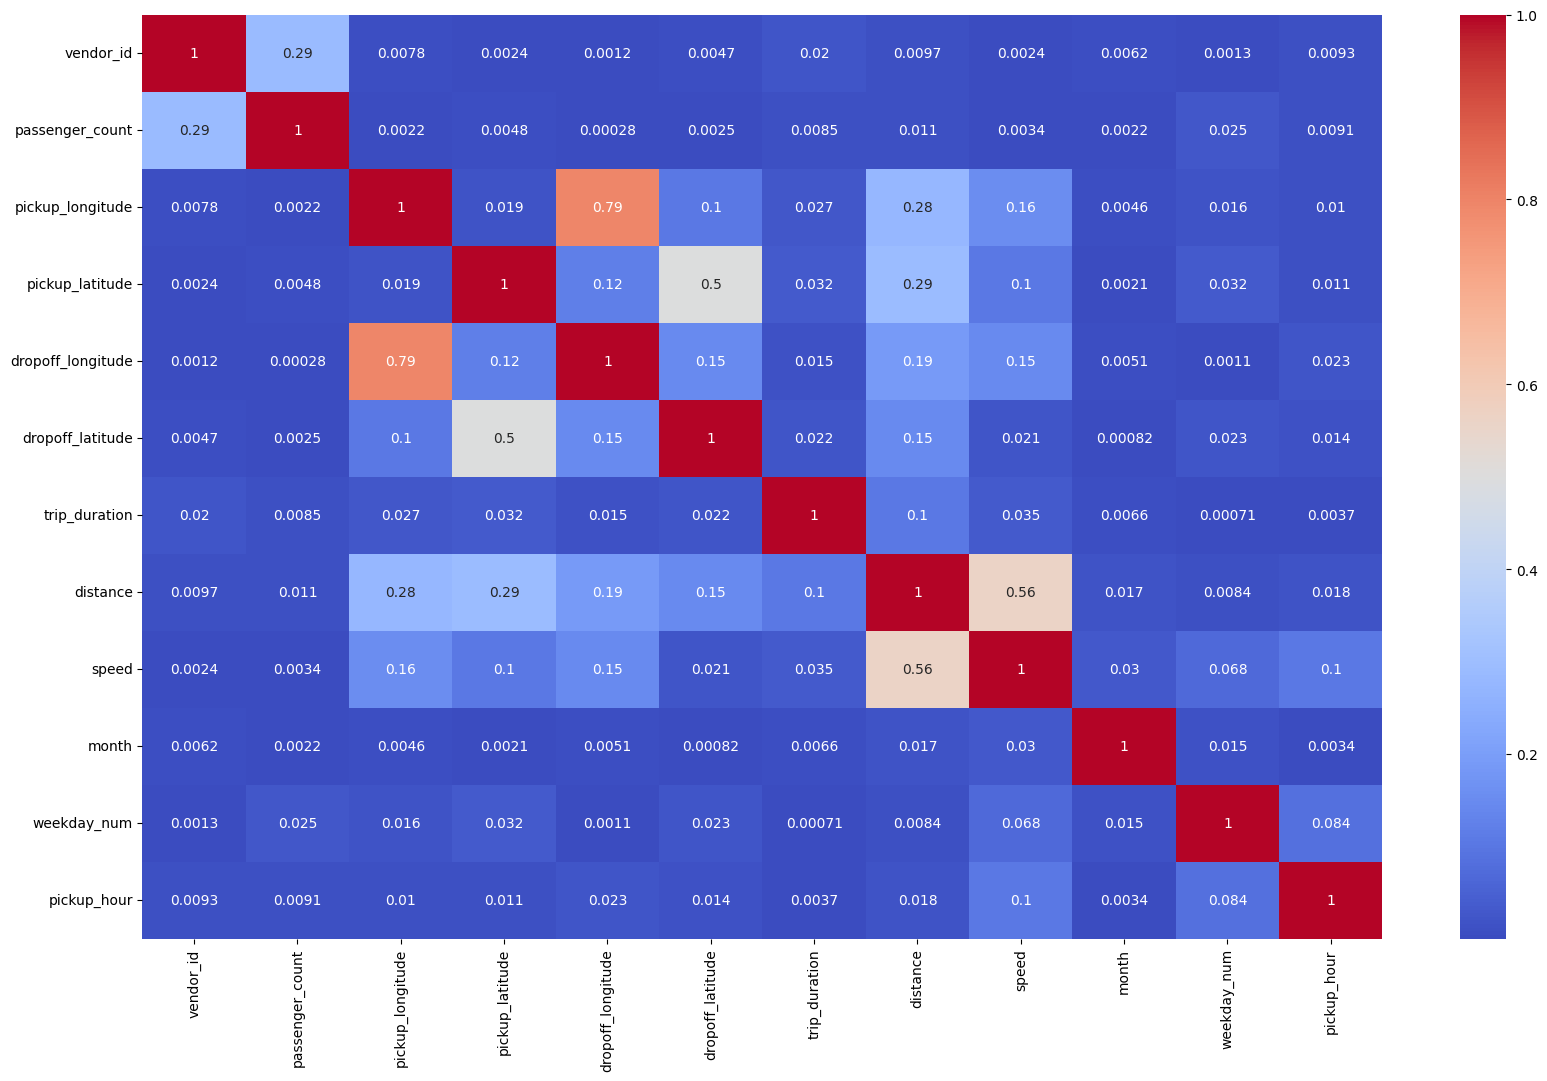

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize=(20,12))
correlation = taxi_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

* A correlation heatmap is a powerful visualization tool that shows the correlations between numerical variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?

* High correlation between pickup and drop off longitudes and lattitudes.
* Distance and speed have high correlation.

#### Chart - 15: - Pair Plot

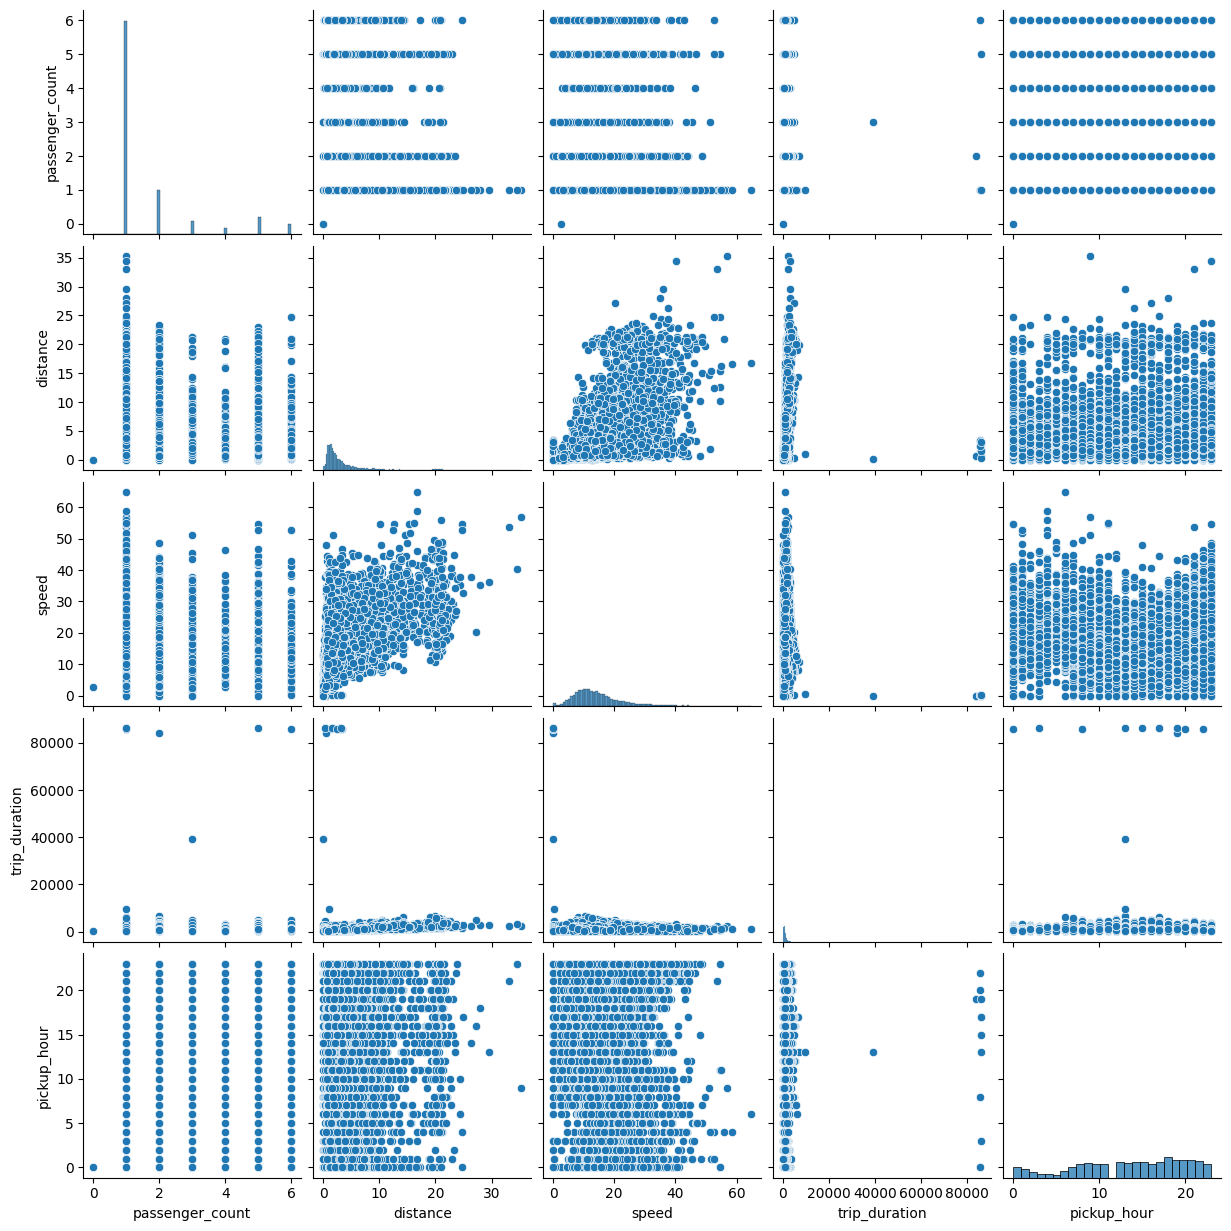

In [ ]:
# Pair Plot visualization code
sampled_df = taxi_df.sample(n=10000, random_state=42)

# Select columns for the pair plot
subset_columns = ['passenger_count', 'distance', 'speed', 'trip_duration', 'pickup_hour']
subset_df = sampled_df[subset_columns]

# Create a pair plot
sns.pairplot(subset_df)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is used to visualize the pairwise relationships between numerical columns in a dataset. It is a grid of scatterplots that displays the relationships between each pair of variables in a dataset. Pair plot is a useful exploratory tool that can help to identify any potential correlations or patterns between the variables. It is particularly useful when dealing with high-dimensional data, where it can be difficult to visually identify relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

* Distance and speed have alinear correlation with eachother
* Lots of outliers for most the graphs.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothesis 1**: Passengers which are travelling at a time is changing with change in vendor.

**Hypothesis 2**: Traffic hours on weekdays are different than traffic hours on weekends.

**Hypothesis 3**: Weekends has more traffic as compared to week days.


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 : 'passenger_count' and 'vendor_id' has no relationship.

H1 : 'passenger_count' and 'vendor_id' has relationship.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

As we are analysing two categorical variables, here We are going to use chi-squre test of independance.

In [ ]:
new = pd.crosstab(taxi_df.passenger_count,taxi_df.vendor_id)
new = pd.DataFrame(new)
new.reset_index(inplace=True)
new['Total'] = new[1] + new[2]
new = new.iloc[1:7,:]
new.set_index('passenger_count',inplace=True)
new.loc['Total'] = new.iloc[:, :].sum()
new

vendor_id             1       2    Total
passenger_count                         
1                550666  482546  1033212
2                 92127  118140   210267
3                 22940   36940    59880
4                 11940   16458    28398
5                   344   77718    78062
6                   152   48169    48321
Total            678169  779971  1458140

In [ ]:
# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = new.index.unique()
columns = new.columns.unique()
for i in columns:
    for j in rows:
        O = new[i][j]
        E = new[i]['Total'] * new['Total'][j] / new['Total']['Total']
        chi_square += (O-E)**2/E

In [ ]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 129632.76166250464  and p value is: 0.0
Null Hypothesis is rejected.


In [ ]:
# The critical value approach
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."

print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 129632.76166250464  and critical value is: 21.02606981748307
Null Hypothesis is rejected.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value is the Chi-Square Test of Independence.

##### Why did you choose the specific statistical test?

The test works by comparing the observed frequencies in each category of the variables to the expected frequencies that would be seen if the variables were independent. The resulting Chi-Square statistic is used to calculate a p-value, which is used to make a decision about whether to reject or fail to reject the null hypothesis. In this case, the null hypothesis is that the two variables (passenger_count and vendor_id) are independent.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 : Traffic hours on weekdays are same as traffic hours on weekends.

H1 : Traffic hours on weekdays are different than traffic hours on weekends.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

In [ ]:
dftraffic = taxi_df[['weekday','pickup_hour']]
weekd = []
for i in dftraffic['weekday']:
  if i in ['Saturday','Sunday']:
    weekd.append('Weekend')
  else:
    weekd.append('Weekday')
dftraffic['weekd'] = weekd
dftraffic.head(3)

weekday  pickup_hour    weekd
0   Monday           17  Weekday
1   Sunday            0  Weekend
2  Tuesday           11  Weekday

In [ ]:
new = pd.crosstab(dftraffic.pickup_hour,dftraffic.weekd)
new = pd.DataFrame(new)
new.reset_index(inplace=True)
new['Total'] = new['Weekday'] + new['Weekend']
new = new.iloc[0:24,:]
new.set_index('pickup_hour',inplace=True)
new.loc['Total'] = new.iloc[:, :].sum()
new

weekd        Weekday  Weekend    Total
pickup_hour                           
0              29191    24030    53221
1              17709    20843    38552
2              11144    16813    27957
3               7985    12888    20873
4               7429     8346    15775
5              11037     3953    14990
6              28549     4676    33225
7              49016     6564    55580
8              57233     9809    67042
9              53414    14231    67645
10             47342    18085    65427
11             48080    20373    68453
12             49986    21868    71854
13             49480    21978    71458
14             52821    21457    74278
15             50737    21056    71793
16             44482    19802    64284
17             54501    21959    76460
18             66564    24013    90577
19             67208    23089    90297
20             63695    20357    84052
21             64057    20108    84165
22             60219    20261    80480
23             50236    19528    69764
Total        1042115   416087  1458202

In [ ]:
# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = new.index.unique()
columns = new.columns.unique()
for i in columns:
    for j in rows:
        O = new[i][j]
        E = new[i]['Total'] * new['Total'][j] / new['Total']['Total']
        chi_square += (O-E)**2/E

In [ ]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 71641.44068914835  and p value is: 0.0
Null Hypothesis is rejected.


Hypothesis 2 Conclusion: Traffic hours on weekdays are different than traffic hours on weekends.

##### Which statistical test have you done to obtain P-Value?

The code performs a chi-square test of independence to obtain the p-value. The chi-square test is a statistical test used to determine if there is a significant association between two categorical variables. The p-value is a measure of the significance of the test, and a small p-value (less than the significance level, alpha) indicates that the association between the two variables is statistically significant and the null hypothesis (that the two variables are same) can be rejected.

##### Why did you choose the specific statistical test?

The specific statistical test, the chi-square test of independence, was chosen because it is used to determine if there is a significant association between two categorical variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 : 'passenger_count' and 'vendor_id' has no relationship.

H1 : 'passenger_count' and 'vendor_id' has relationship.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

We are going to analys two categorical variables so we are going to use chi_square test of independence.

In [ ]:
new = pd.crosstab(taxi_df.passenger_count,taxi_df.vendor_id)
new = pd.DataFrame(new)
new.reset_index(inplace=True)
new['Total'] = new[1] + new[2]
new = new.iloc[1:7,:]
new.set_index('passenger_count',inplace=True)
new.loc['Total'] = new.iloc[:, :].sum()
new

vendor_id             1       2    Total
passenger_count                         
1                550666  482546  1033212
2                 92127  118140   210267
3                 22940   36940    59880
4                 11940   16458    28398
5                   344   77718    78062
6                   152   48169    48321
Total            678169  779971  1458140

In [ ]:
# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = new.index.unique()
columns = new.columns.unique()
for i in columns:
    for j in rows:
        O = new[i][j]
        E = new[i]['Total'] * new['Total'][j] / new['Total']['Total']
        chi_square += (O-E)**2/E

In [ ]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 129632.76166250464  and p value is: 0.0
Null Hypothesis is rejected.


In [ ]:
# The critical value approach
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."

print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 129632.76166250464  and critical value is: 21.02606981748307
Null Hypothesis is rejected.


Hypothesis 3 Conclusion: Passenger count and vendor id has relationship.

##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value is the Chi-Square Test of Independence.

##### Why did you choose the specific statistical test?

The test works by comparing the observed frequencies in each category of the variables to the expected frequencies that would be seen if the variables were independent. The resulting Chi-Square statistic is used to calculate a p-value, which is used to make a decision about whether to reject or fail to reject the null hypothesis. In this case, the null hypothesis is that the two variables (passenger_count and vendor_id) are independent.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

In [ ]:
taxi_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
distance              0
speed                 0
weekday               0
month                 0
weekday_num           0
pickup_hour           0
dtype: int64

There are no missing or null values in the dataset.

### 2. Handling Outliers

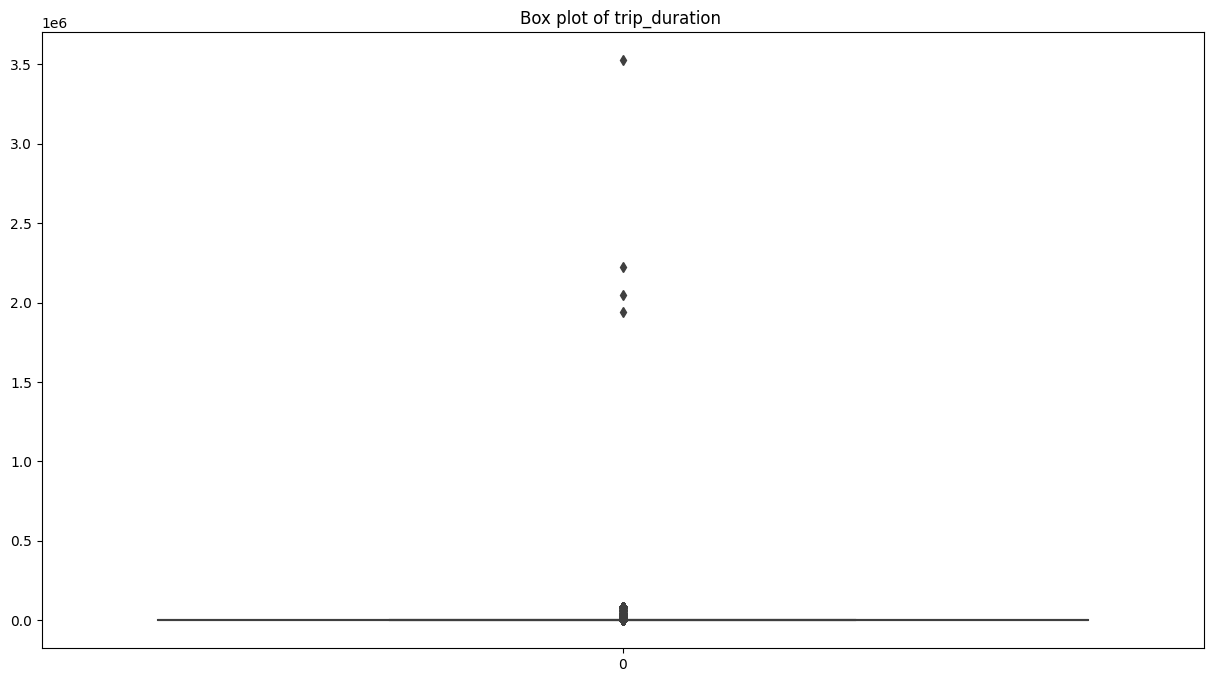

In [ ]:
# Handling Outliers & Outlier treatments
# Starting with trip duration as noticed during data visualization it has a lot of outliers.
plt.figure(figsize=(15,8))
plt.title("Box plot of trip_duration ")
ax = sns.boxplot(data=taxi_df['trip_duration'], orient="v")

In [ ]:
percentile_q1_trip_duration = np.percentile(taxi_df['trip_duration'],25)
print(percentile_q1_trip_duration)
percentile_q2_trip_duration = np.percentile(taxi_df['trip_duration'],50)
print(percentile_q2_trip_duration)
percentile_q3_trip_duration = np.percentile(taxi_df['trip_duration'],75)
print(percentile_q3_trip_duration)

397.0
662.0
1075.0


In [ ]:
iqr=percentile_q3_trip_duration - percentile_q1_trip_duration
lower_limit_outlier_trip_duration=percentile_q1_trip_duration-1.5*iqr
upper_limit_outlier_trip_duration=percentile_q3_trip_duration+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_trip_duration)
print("Upper limit for outlier  :",upper_limit_outlier_trip_duration)

lower limit for outlier  : -620.0
Upper limit for outlier  : 2092.0


In [ ]:
taxi_df=taxi_df[taxi_df['trip_duration'] > 0]
taxi_df=taxi_df[taxi_df['trip_duration'] < upper_limit_outlier_trip_duration]

In [ ]:
# Now handeling outliers in the distance travelled

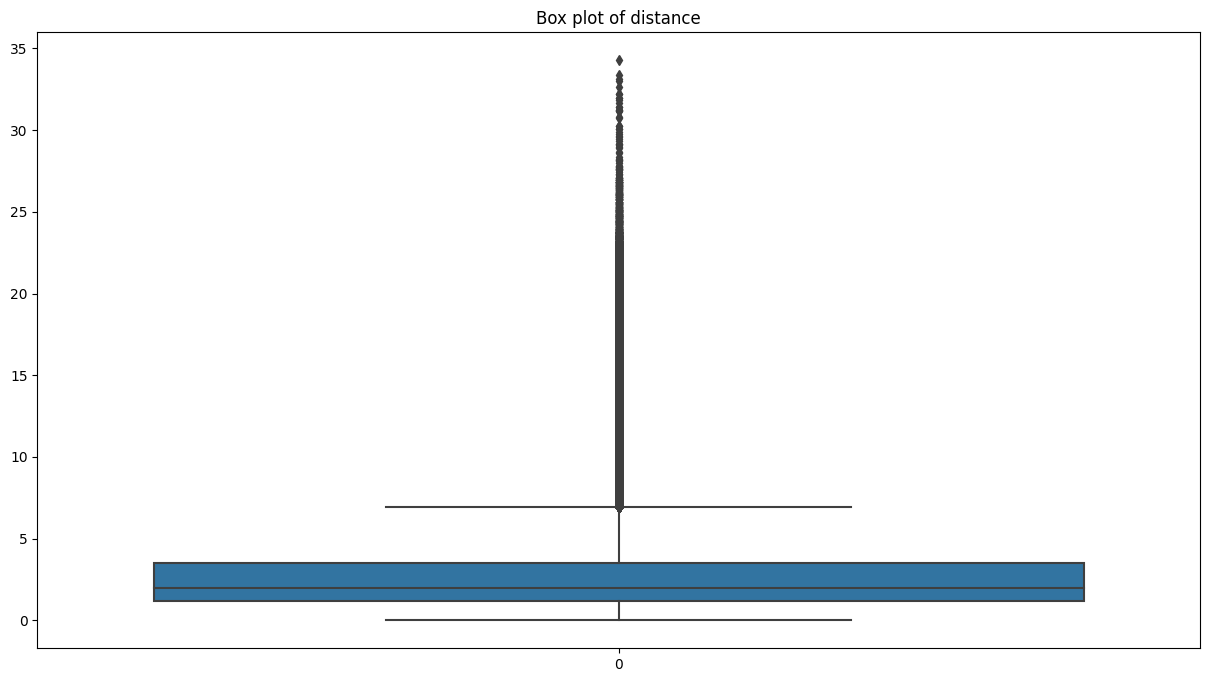

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Box plot of distance")
ax = sns.boxplot(data=taxi_df['distance'], orient="v")

In [ ]:
percentile_q1 = np.percentile(taxi_df['distance'],25)
print(percentile_q1)
percentile_q2 = np.percentile(taxi_df['distance'],50)
print(percentile_q2)
percentile_q3 = np.percentile(taxi_df['distance'],75)
print(percentile_q3)

1.1984344062566725
1.992576615205292
3.4853687370842232


In [ ]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.2319670899846535
Upper limit for outlier  : 6.915770233325549


In [ ]:
taxi_df=taxi_df[taxi_df['distance'] > lower_limit_outlier]
taxi_df=taxi_df[taxi_df['distance'] < upper_limit_outlier]

In [ ]:
# Now handeling outliers in speed

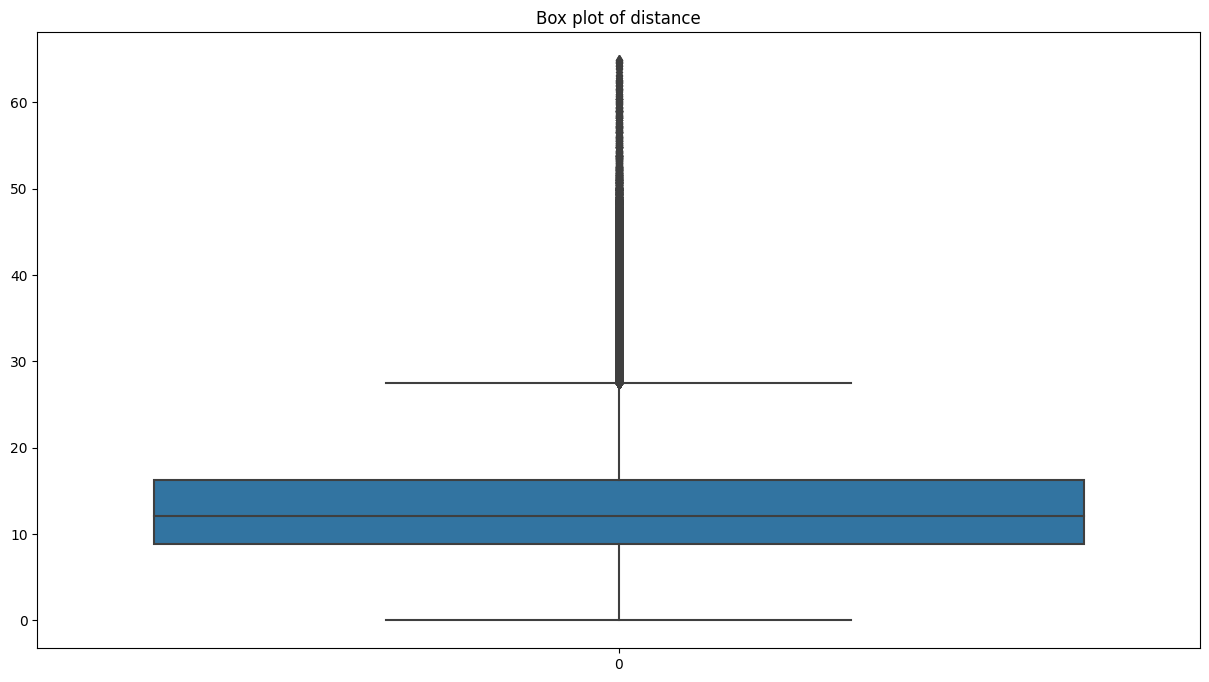

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Box plot of distance")
ax = sns.boxplot(data=taxi_df['speed'], orient="v")

In [ ]:
percentile_q1 = np.percentile(taxi_df['speed'],25)
print(percentile_q1)
percentile_q2 = np.percentile(taxi_df['speed'],50)
print(percentile_q2)
percentile_q3 = np.percentile(taxi_df['speed'],75)
print(percentile_q3)

8.787746004495345
12.078737849388096
16.283604628990794


In [ ]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.45604193224783
Upper limit for outlier  : 27.52739256573397


In [ ]:
taxi_df=taxi_df[taxi_df['speed'] > lower_limit_outlier]
taxi_df=taxi_df[taxi_df['speed'] < upper_limit_outlier]

In [ ]:
# Now handeling outliers in Passenger Count.

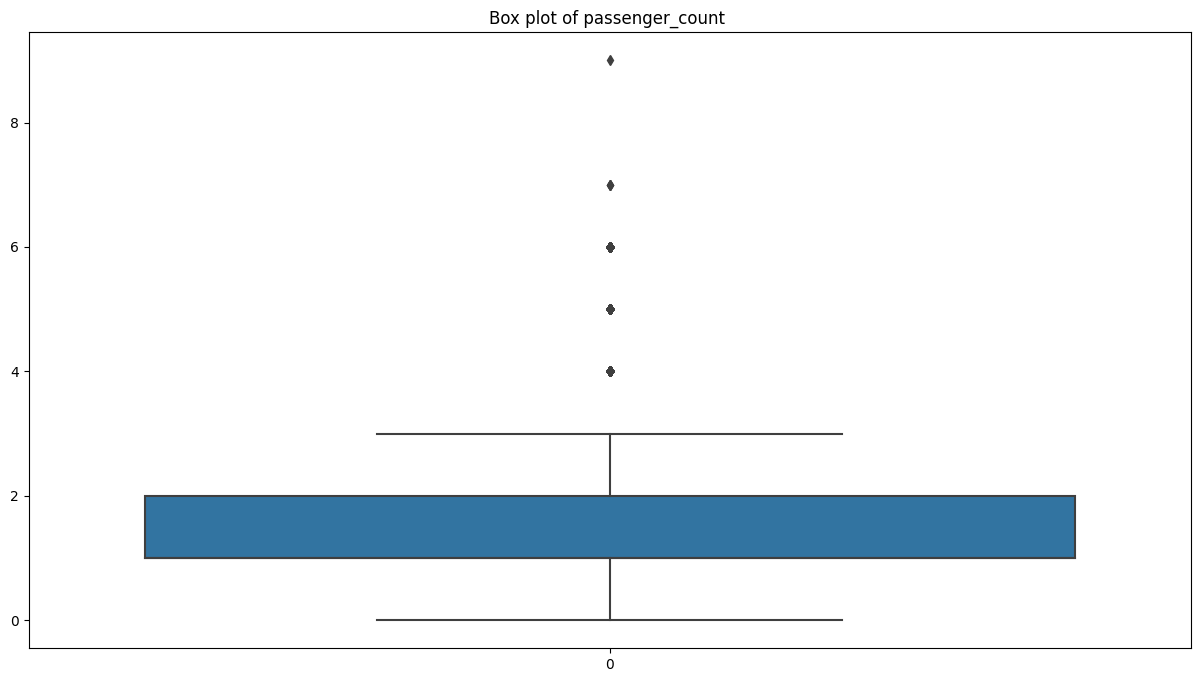

In [ ]:
# Treating outliers for Passenger Count.
plt.figure(figsize=(15,8))
plt.title("Box plot of passenger_count ")
ax = sns.boxplot(data=taxi_df['passenger_count'])

In [ ]:
percentile_q1_passenger_count = np.percentile(taxi_df['passenger_count'],25)
print(percentile_q1_passenger_count)
percentile_q2_passenger_count = np.percentile(taxi_df['passenger_count'],50)
print(percentile_q2_passenger_count)
percentile_q3_passenger_count = np.percentile(taxi_df['passenger_count'],75)
print(percentile_q3_passenger_count)

1.0
1.0
2.0


In [ ]:
iqr=percentile_q3_passenger_count - percentile_q1_passenger_count
lower_limit_outlier_passenger_count=percentile_q1_passenger_count-1.5*iqr
upper_limit_outlier_passenger_count=percentile_q3_passenger_count+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_passenger_count)
print("Upper limit for outlier  :",upper_limit_outlier_passenger_count)

lower limit for outlier  : -0.5
Upper limit for outlier  : 3.5


In [ ]:
taxi_df=taxi_df[taxi_df['passenger_count'] > 0]

In [ ]:
taxi_df=taxi_df[taxi_df['passenger_count'] < upper_limit_outlier_passenger_count]

In [ ]:
taxi_df.shape

(1106011, 17)

##### What all outlier treatment techniques have you used and why did you use those techniques?

* The outlier treatment technique used in the code is Interquartile range (IQR) method. The IQR method involves calculating the first quartile (25th percentile), second quartile (50th percentile), and third quartile (75th percentile) of the variable. The interquartile range (IQR) is calculated by subtracting the first quartile from the third quartile. Then, lower and upper bounds for outliers are defined as 1.5 times the IQR below the first quartile and 1.5 times the IQR above the third quartile respectively. Finally, the data is filtered by removing all the observations that are below the lower limit or above the upper limit, as they are considered outliers.

* This technique was used because it is a commonly used method to identify and handle outliers, as it is based on the distribution of the data and it eliminates outliers that are beyond the range of normal values in the dataset.
* Analysing the trip duration data we found out there are outliers so we removed the data in which the trip duration greater than 5000 seconds and also trip duration less than 30 seconds
* Distance travelled also has outliers when it was vizualized so entries in which distance was less than 50 meter and greater than 100km was removed
* While removing the outliers of distance and trip duration outliers for speed also got removed we verified by data vizulaisation that there are no outliers.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

In [ ]:
taxi_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance', 'speed', 'weekday', 'month', 'weekday_num',
       'pickup_hour'],
      dtype='object')

In [ ]:
#Dummify all the categorical features like "store_and_fwd_flag, Day" except the label i.e. "trip_duration"
taxi_df= pd.get_dummies(taxi_df, columns=['store_and_fwd_flag','passenger_count','vendor_id'],
                        prefix=['flag','passenger_count','vendor_id'])

In [ ]:
taxi_df.head(2)

id     pickup_datetime    dropoff_datetime  pickup_longitude  \
0  id2875421 2016-03-14 17:24:55 2016-03-14 17:32:30            -73.98   
1  id2377394 2016-06-12 00:43:35 2016-06-12 00:54:38            -73.98   

   pickup_latitude  dropoff_longitude  dropoff_latitude  trip_duration  \
0            40.77             -73.96             40.77            455   
1            40.74             -74.00             40.73            663   

   distance  speed  ... month  weekday_num  pickup_hour  flag_N  flag_Y  \
0      1.50  11.86  ...     3            0           17       1       0   
1      1.81   9.80  ...     6            6            0       1       0   

   passenger_count_1  passenger_count_2  passenger_count_3  vendor_id_1  \
0                  1                  0                  0            0   
1                  1                  0                  0            1   

   vendor_id_2  
0            1  
1            0  

[2 rows x 21 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

The chosen method for categorical encoding in this context is one-hot encoding, often referred to as dummy encoding. One-hot encoding is employed because categorical variables typically lack a numeric format, yet machine learning algorithms necessitate numerical input.

One-hot encoding involves the conversion of each categorical value into a distinct categorical representation and the assignment of binary values, either 1 or 0. For each unique category in the original data, a new column is created, wherein the value is set to 1 if the category is present in the original dataset and 0 otherwise. This technique is valuable for effectively managing categorical data when constructing a machine learning model.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

From above columns we have already created distance column by using pickup and dropoff lattitudes and longitudes.

We have already created speed column by using distance and trip duration.

By extracting, we have created pickup weekday, month, weekday num, pickup hour, pickup minute column from date time columns

Creating one more feature i.e. trip cords (coordinates) using latitudes and longitudes.

In [ ]:
import math
"Creating a function to get the bearing"
def get_bearing(lat1, long1, lat2, long2):
    dLon = (long2 - long1)
    x = math.cos(math.radians(lat2)) * math.sin(math.radians(dLon))
    y = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(math.radians(dLon))
    brng = np.arctan2(x,y)
    brng = np.degrees(brng)
    if brng < 0:
      brng = 360 + brng
      return brng
    else:
      return brng

In [ ]:
taxi_df['trip_cords'] = taxi_df.apply(lambda x: get_bearing(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],
                       x['dropoff_longitude']), axis = 1)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

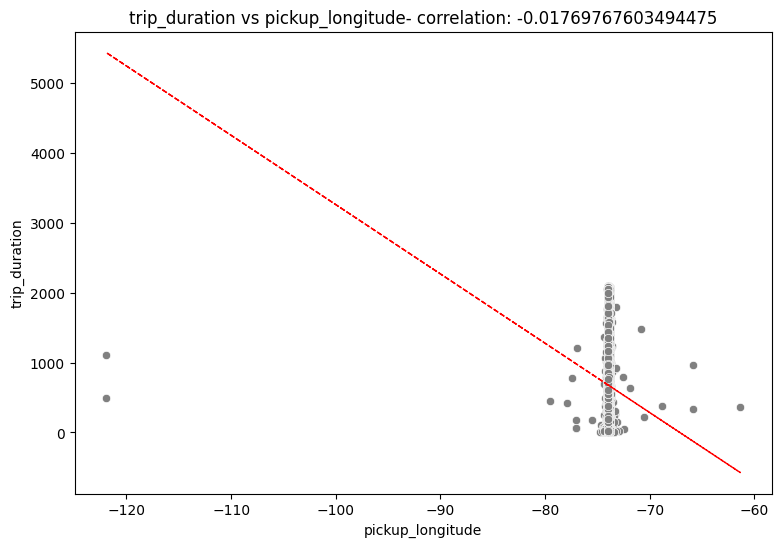

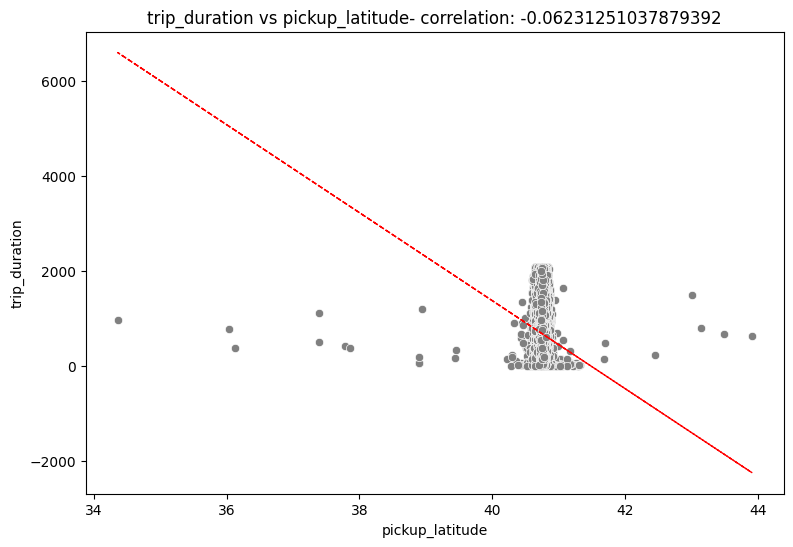

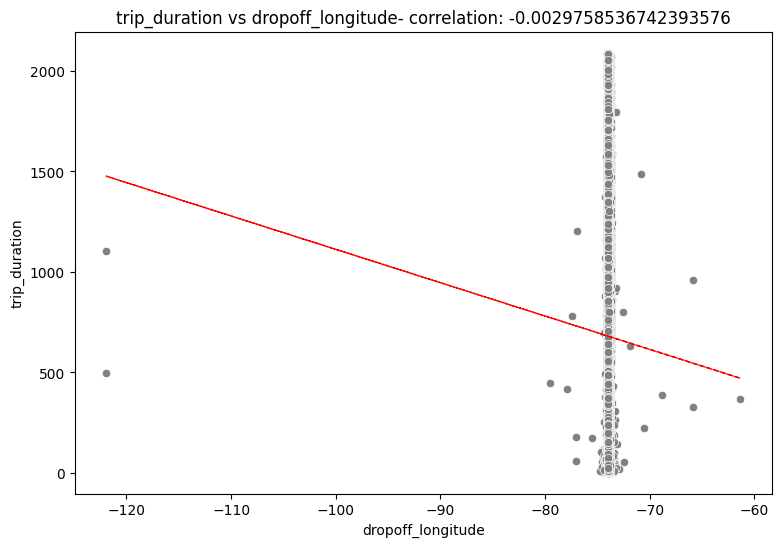

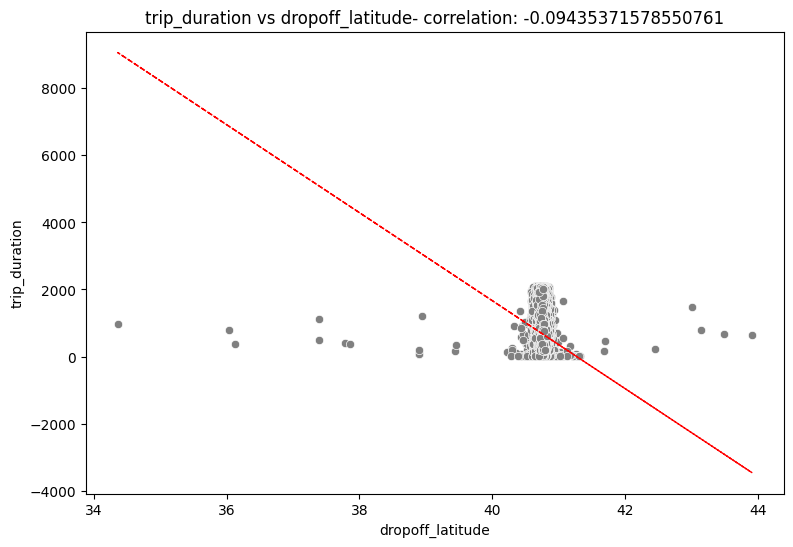

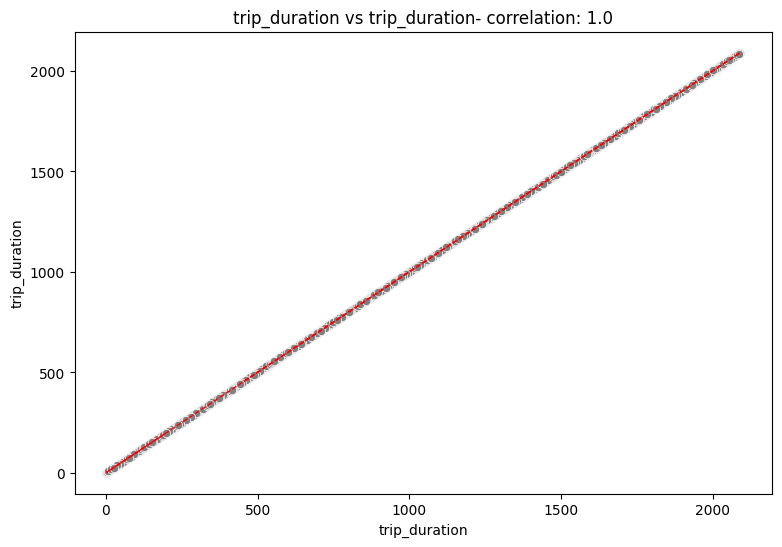

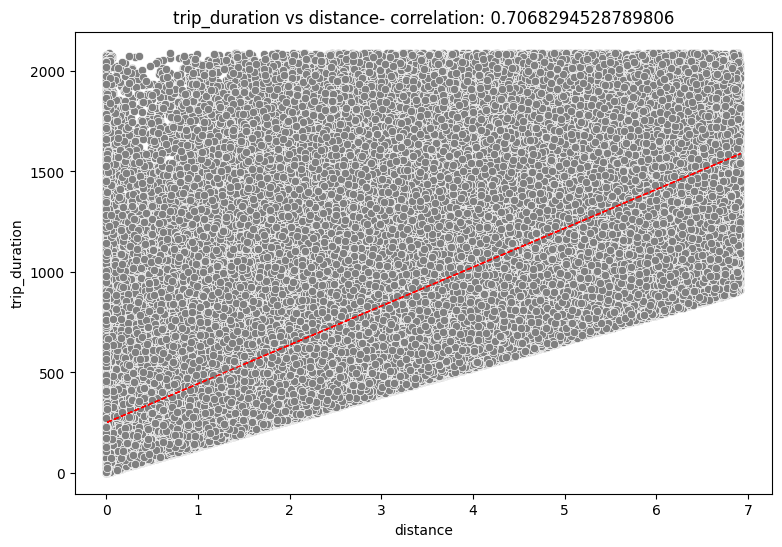

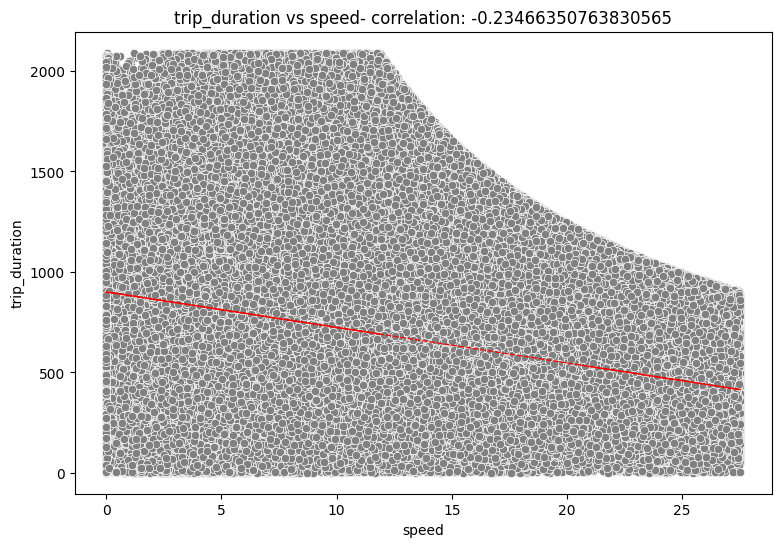

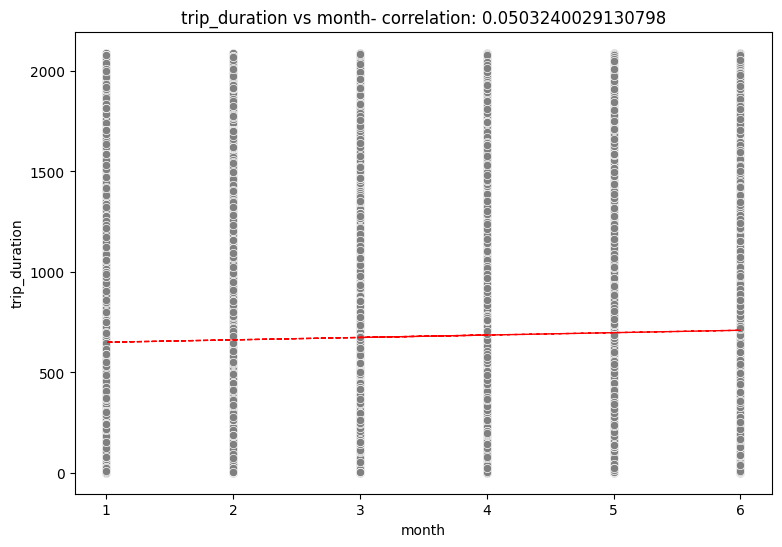

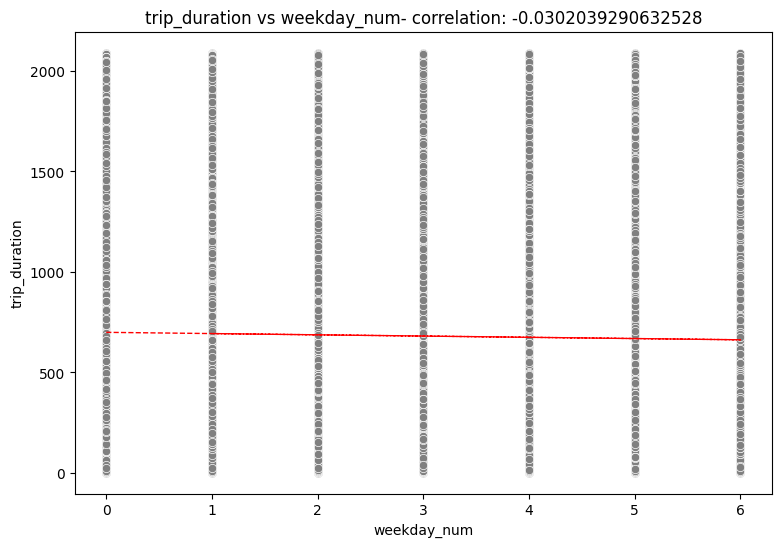

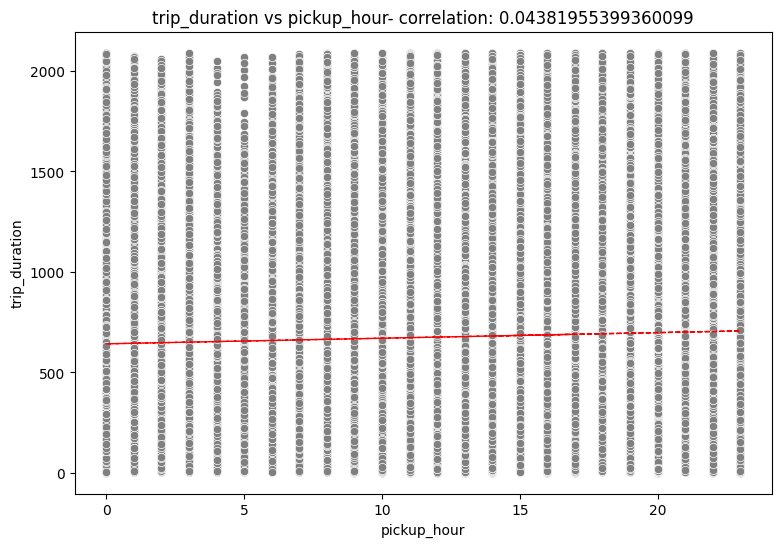

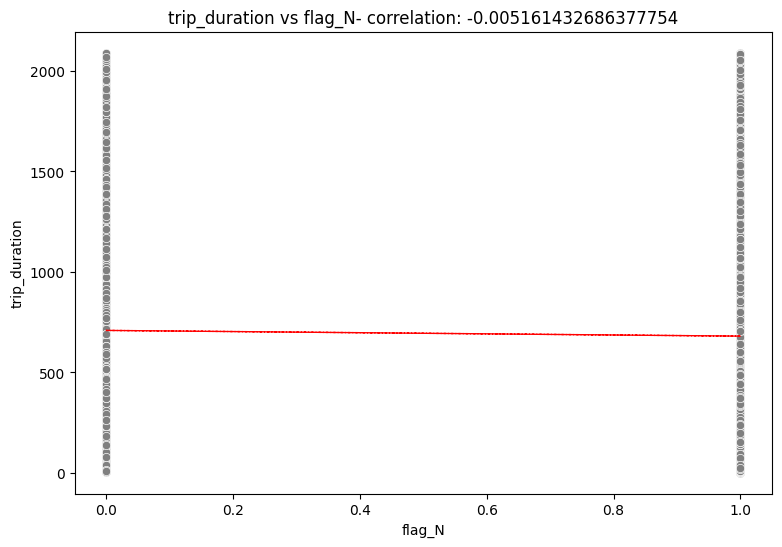

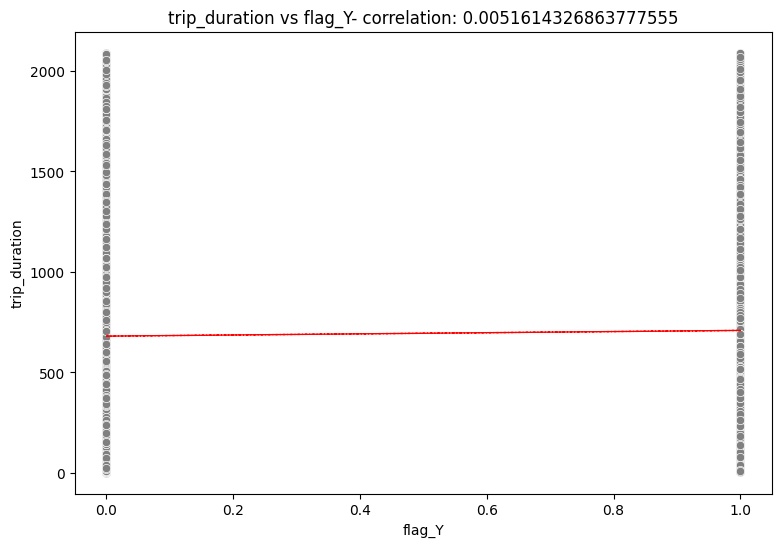

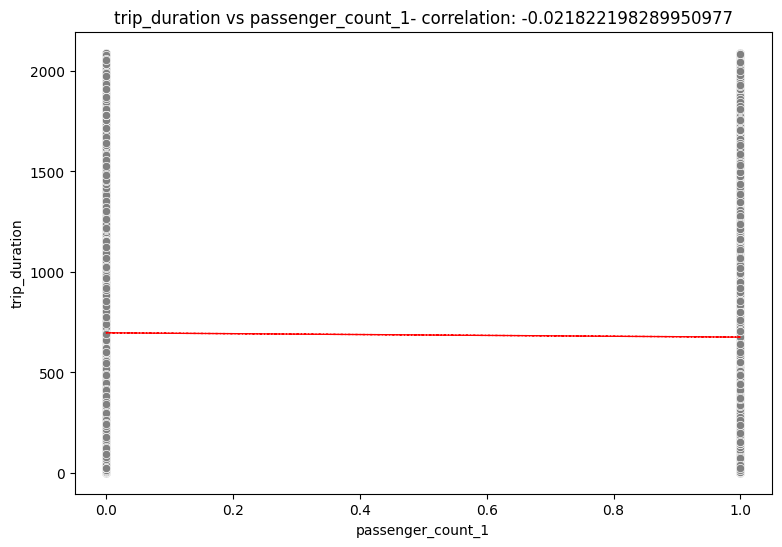

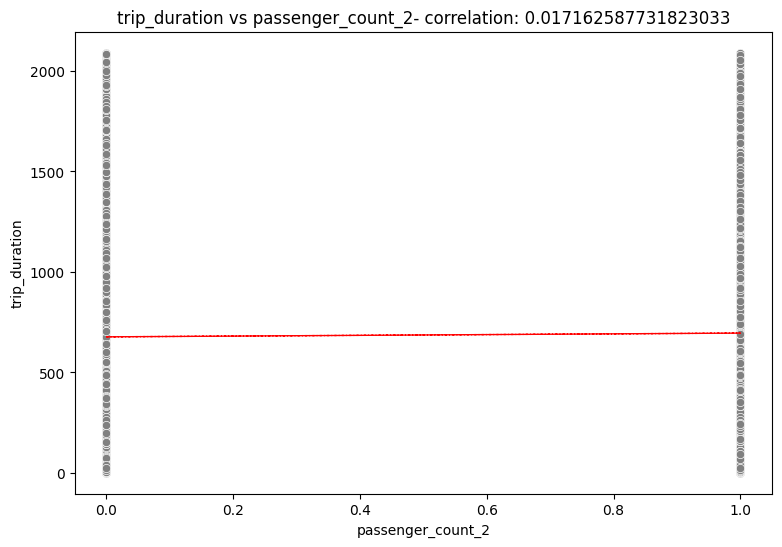

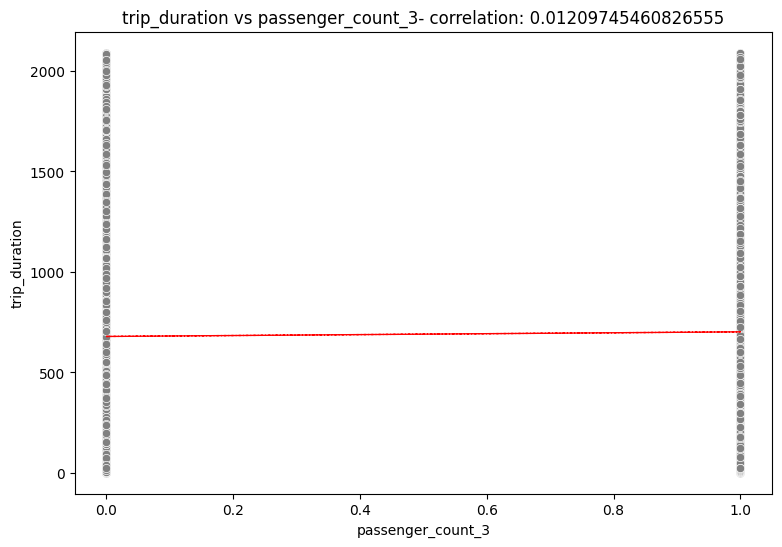

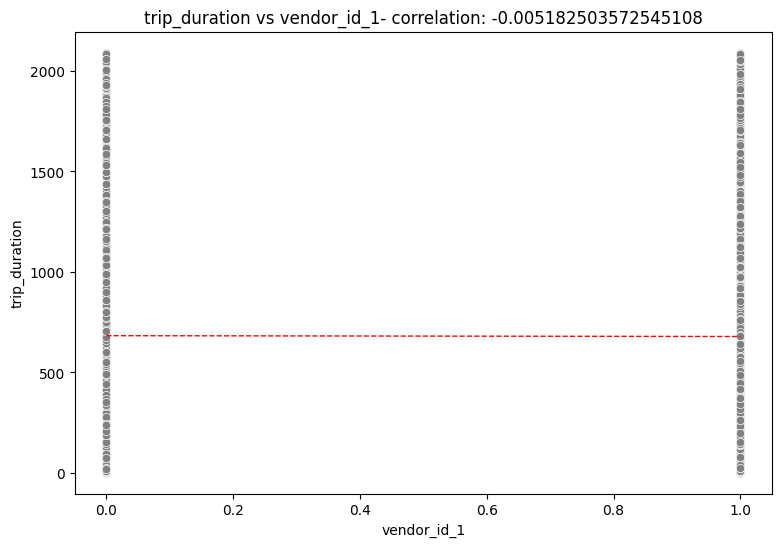

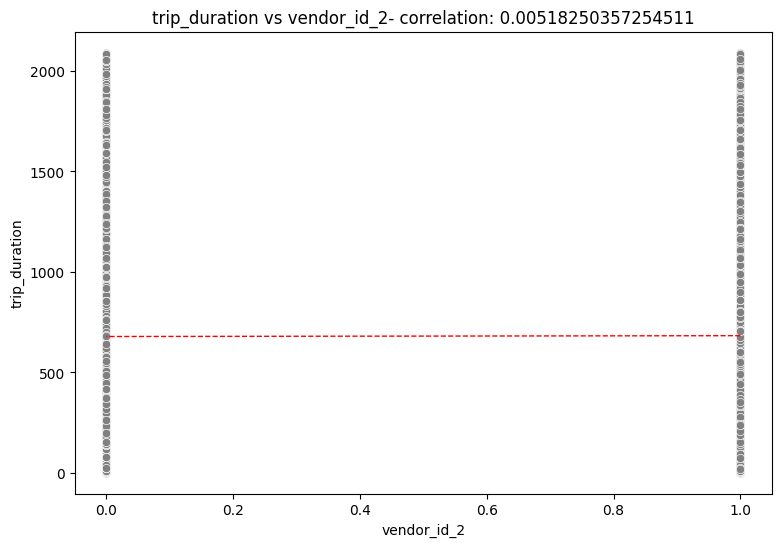

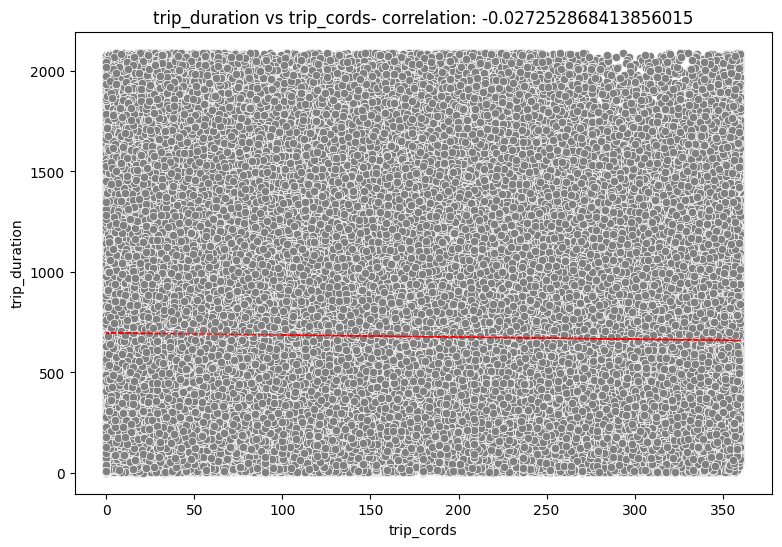

In [ ]:
# Checking how trip duration is related to other features
for col in taxi_df.describe().columns.tolist():
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = taxi_df[col]
    label = taxi_df['trip_duration']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label, color="gray")
    plt.xlabel(col)
    plt.ylabel('trip_duration')
    ax.set_title('trip_duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(taxi_df[col], taxi_df['trip_duration'], 1)
    y_hat = np.poly1d(z)(taxi_df[col])
    plt.plot(taxi_df[col], y_hat, "r--", lw=1)
    plt.show()

<Axes: >

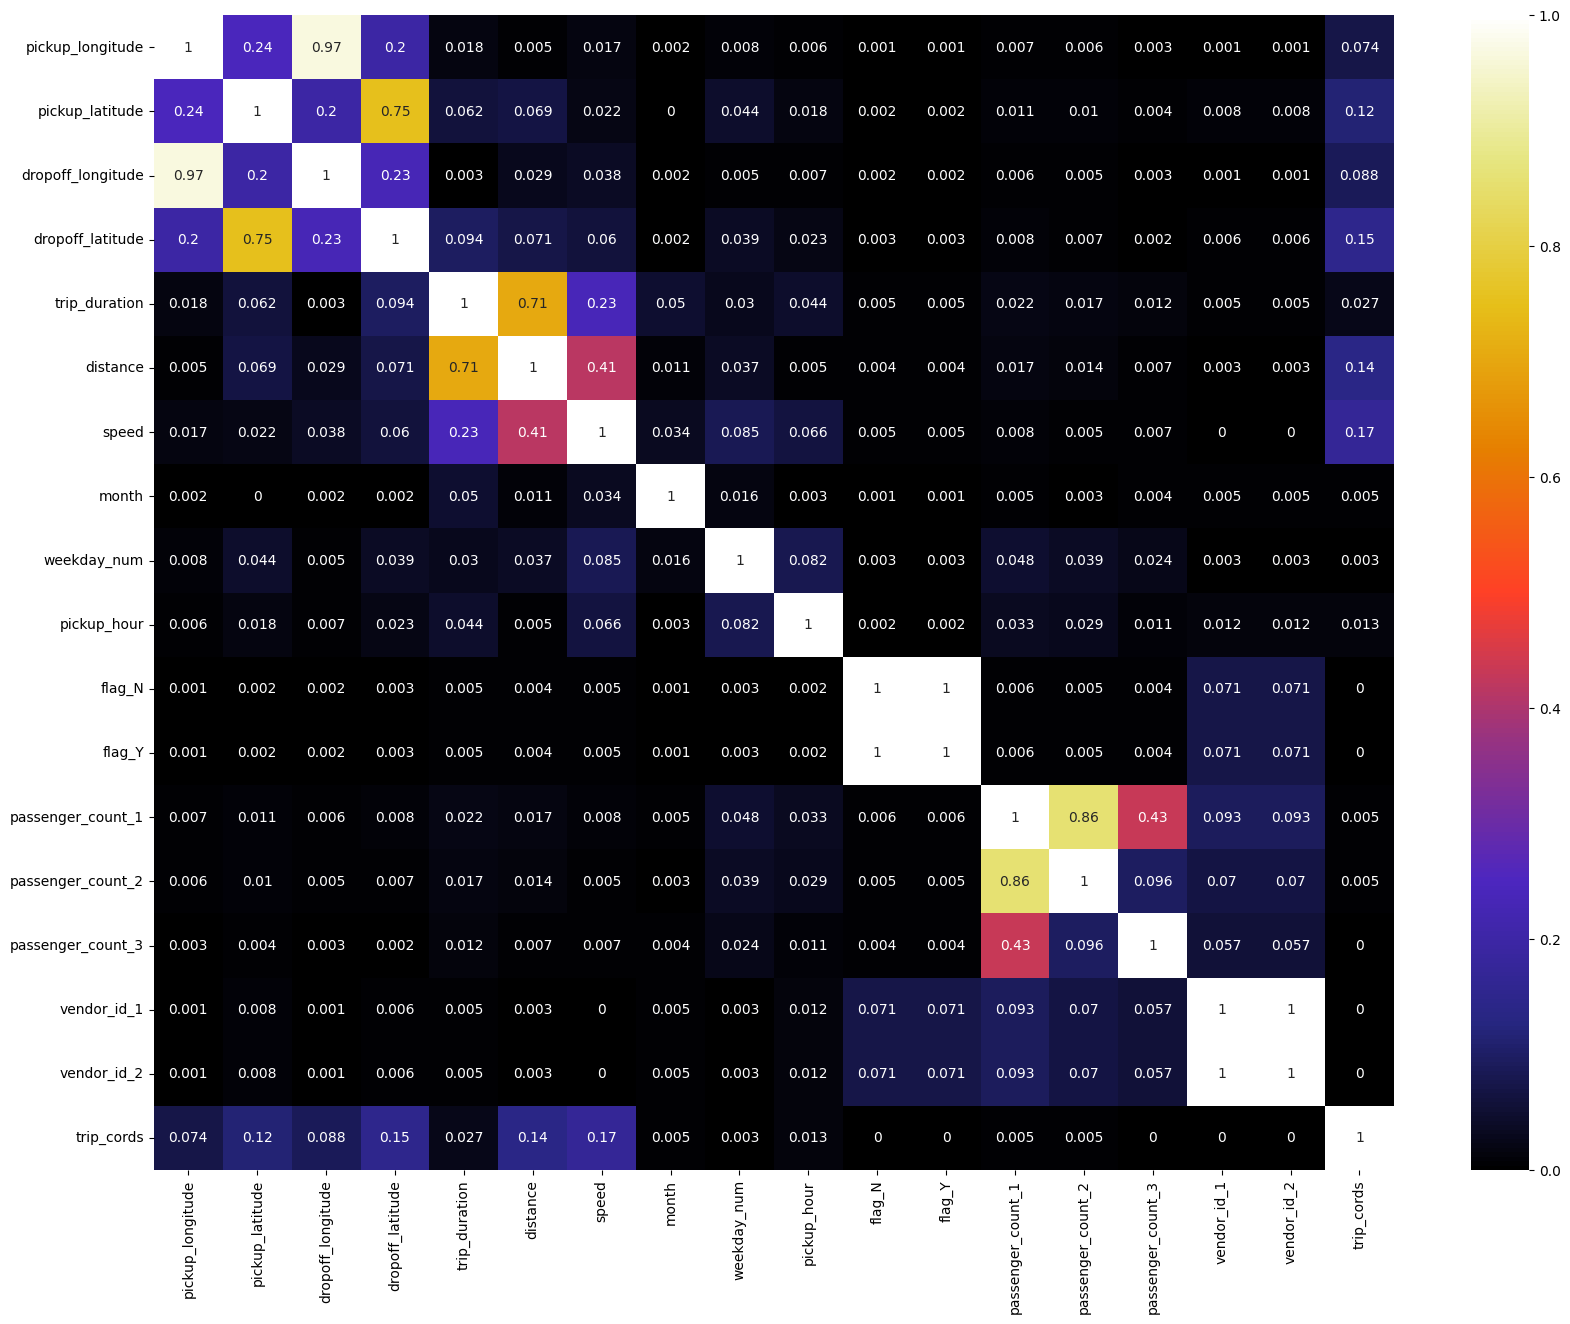

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(abs(round(taxi_df.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

##### What all feature selection methods have you used  and why?

We employed scatter plots to assess the impact of individual variables on the target variable.

Regarding the Correlation Matrix (Heatmap): A correlation matrix serves as a valuable tool for identifying features with strong correlations to the target variable while also having weak correlations with other features.

##### Which all features you found important and why?


We are selecting features based on the information they provide and eliminating features from the dataset that convey redundant information.

To achieve this, we have employed two methods:

* Hypothesis testing has revealed that variables like "pickup weekday" and "pickup hours" have a significant impact on the number of trips and traffic conditions, indirectly influencing trip duration.

* In our correlation heatmap analysis, we observed a high correlation between "pickup_latitude" and "dropoff_latitude" as well as between "pickup_longitude" and "dropoff_longitude." Consequently, we will retain one of each pair, prioritizing the feature that has a stronger impact on our target variable, "trip_duration."

* Similarly, "Passenger_count_1," "Passenger_count_2," and "Passenger_count_3" exhibit high correlations among themselves. We will retain those that have a more pronounced effect on our dependent variable.

* The same logic applies to the features "flag_Y" and "flag_N" and "vendor_id_1" and "vendor_id_2." We will retain one of each pair based on their influence on the target variable.

* We have also generated some features through data manipulation, such as "distance," which significantly affects our target variable. These features will be preserved.

* Regarding the "Speed" feature, including it as a predictor in our regression model could violate the independence assumption between features and the target. This is because speed is derived from both the target variable (trip duration) and the "distance" feature. Such a violation could lead to overfitting and reduced model performance. Hence, we have decided to exclude the "Speed" feature from our analysis.

#### Creating Final Dataset

In [ ]:
taxi_df.columns

Index(['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'trip_duration', 'distance', 'speed', 'weekday', 'month', 'weekday_num',
       'pickup_hour', 'flag_N', 'flag_Y', 'passenger_count_1',
       'passenger_count_2', 'passenger_count_3', 'vendor_id_1', 'vendor_id_2',
       'trip_cords'],
      dtype='object')

In [ ]:
final_df= taxi_df[['vendor_id_1','passenger_count_1','pickup_longitude','dropoff_latitude','flag_Y',
              'weekday_num','pickup_hour','trip_cords','distance','trip_duration']]

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

In [ ]:
# checking which of the variables are continous in nature
for i in final_df.columns:
  print(f"The number of unique counts in feature {i} is: {final_df[i].nunique()}")

The number of unique counts in feature vendor_id_1 is: 2
The number of unique counts in feature passenger_count_1 is: 2
The number of unique counts in feature pickup_longitude is: 18856
The number of unique counts in feature dropoff_latitude is: 45498
The number of unique counts in feature flag_Y is: 2
The number of unique counts in feature weekday_num is: 7
The number of unique counts in feature pickup_hour is: 24
The number of unique counts in feature trip_cords is: 1100244
The number of unique counts in feature distance is: 1100543
The number of unique counts in feature trip_duration is: 2091


In [ ]:
# Storing the continous variables(number of unique counts >60) in a separate list and treating them in order to make gaussian distribution
cont_variables= ["trip_duration","distance","trip_cords"]

Before Applying Transformation


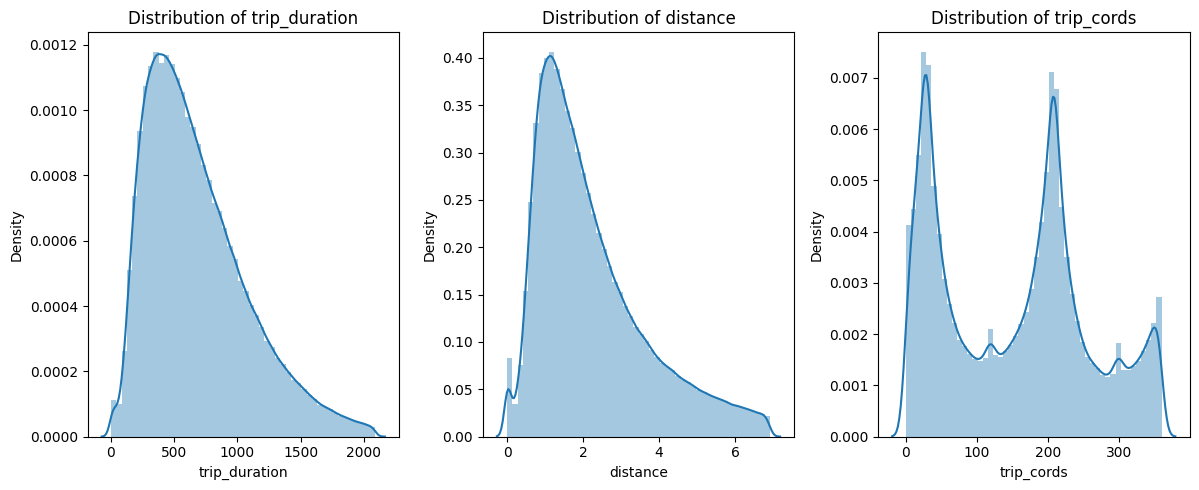

In [ ]:
# Checking the distribution of each continous variable from our final dataframe
plt.figure(figsize=(20,5))
print("Before Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

In [ ]:
#### For checking whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    stats.probplot(df[feature],dist='norm',plot=pylab)

Q-Q Plot for variable: trip_duration
Q-Q Plot for variable: distance
Q-Q Plot for variable: trip_cords


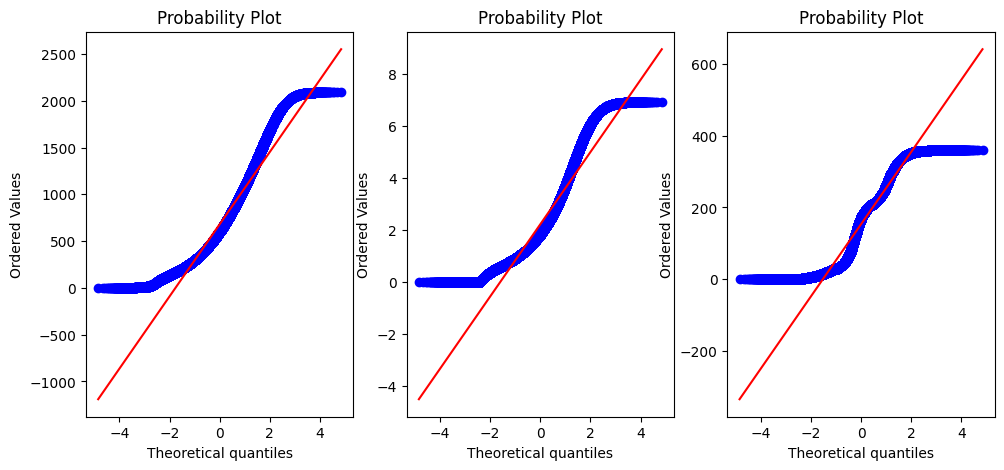

In [ ]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(final_df,column)
plt.show()

As evident from the previous plots, our continuous numeric features do not adhere to a perfectly normal distribution pattern. Therefore, our next step is to explore various transformation techniques in an attempt to achieve a Gaussian distribution curve.

Let's create different copies and check which transformation is best for each feature

In [ ]:
# Creating 5 different copies to check the distribution of each of the variable
test_df1=final_df.copy()
test_df2=final_df.copy()
test_df3=final_df.copy()
test_df4=final_df.copy()

#### Logarithmic Transformation

After Applying Transformation


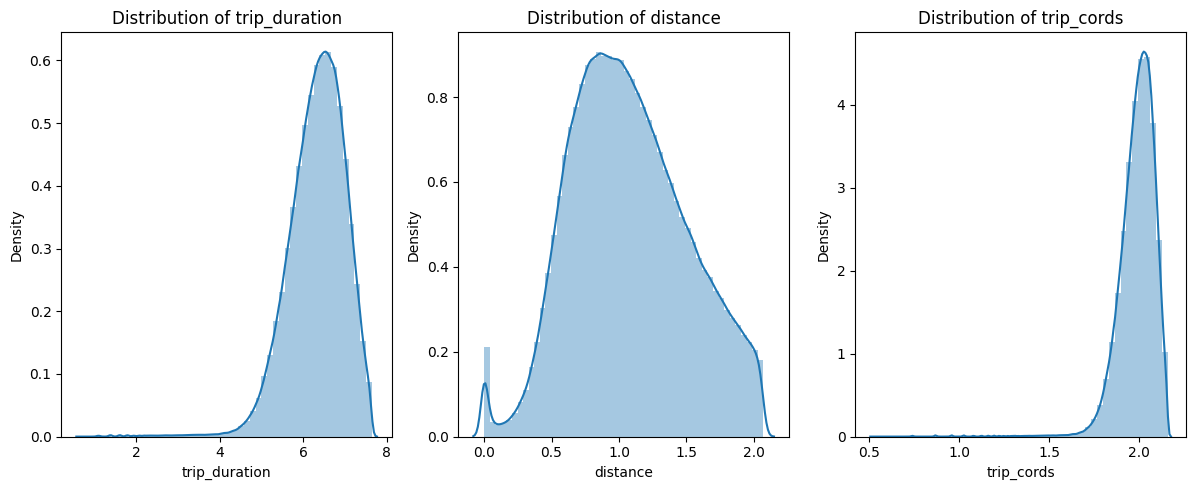

In [ ]:
# Applying transformation on the above considered columns
test_df1['trip_duration']=np.log(test_df1['trip_duration']+1)
test_df1['distance']=np.log(test_df1['distance']+1)
test_df1['trip_cords']=np.log(test_df1['trip_duration']+1)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df1[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: trip_duration
Q-Q Plot for variable: distance
Q-Q Plot for variable: trip_cords


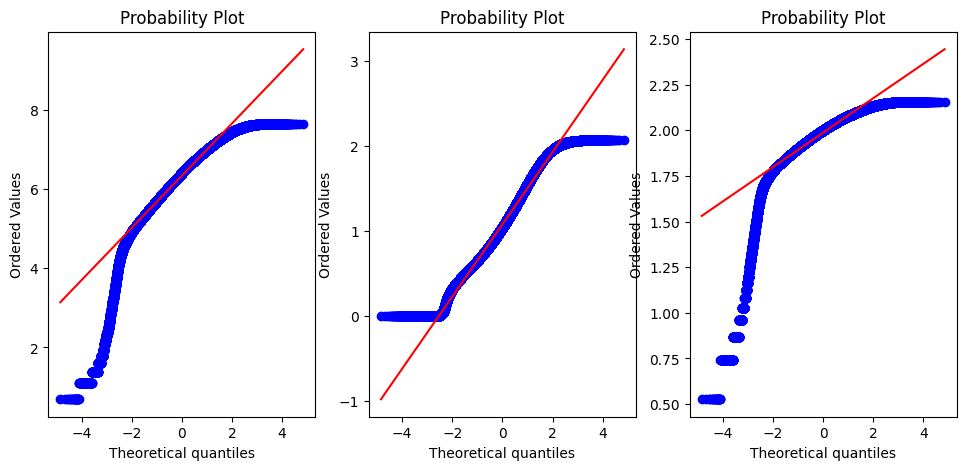

In [ ]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df1,column)
plt.show()

#### Reciprocal Transformation

After Applying Transformation


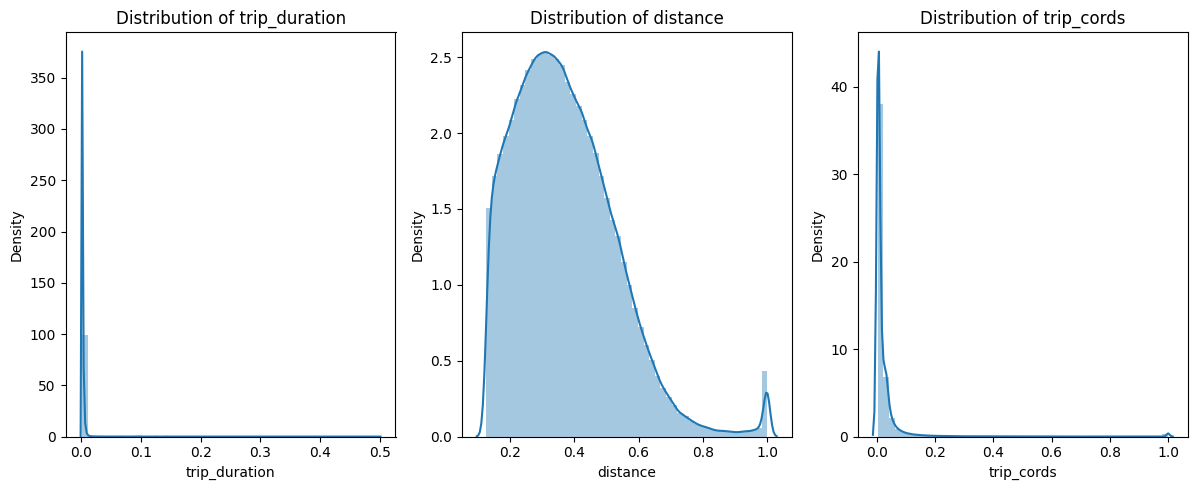

In [ ]:
# Applying transformation on the above considered columns
test_df2['trip_duration']=1/(test_df2['trip_duration']+1)
test_df2['distance']=1/(test_df2['distance']+1)
test_df2['trip_cords']=1/(test_df2['trip_cords']+1)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df2[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: trip_duration
Q-Q Plot for variable: distance
Q-Q Plot for variable: trip_cords


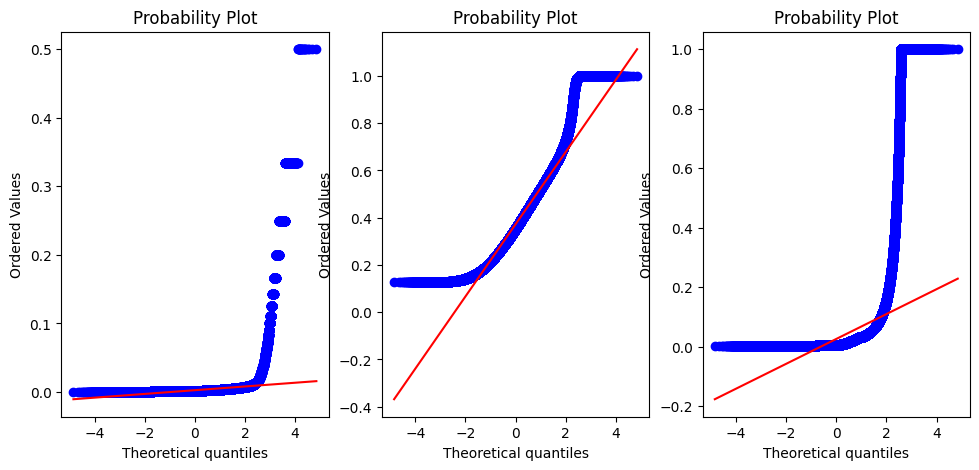

In [ ]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df2,column)
plt.show()

#### Square Root Transformation

After Applying Transformation


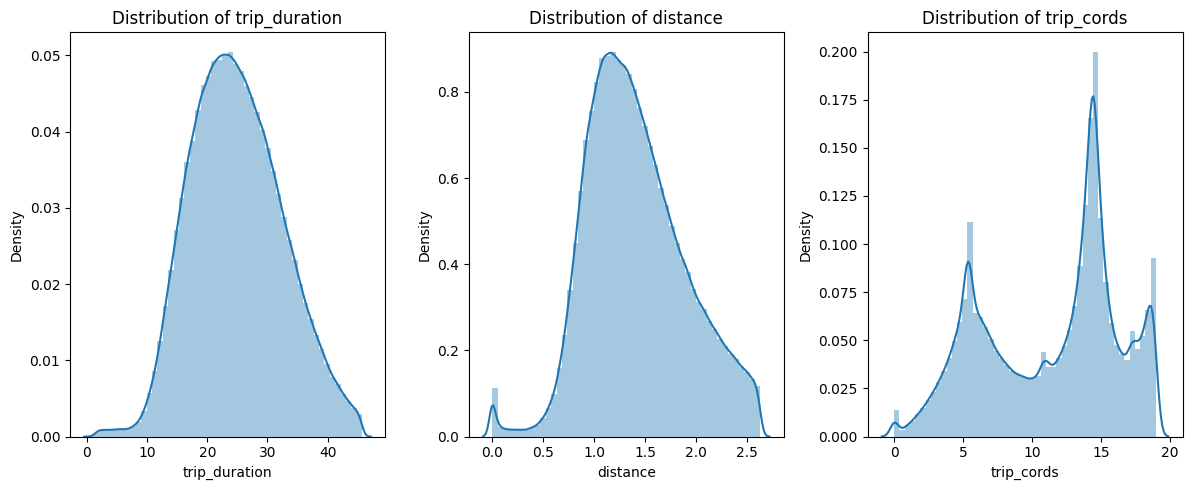

In [ ]:
# Applying transformation on the above considered columns
test_df3['trip_duration']=(test_df3['trip_duration'])**(1/2)
test_df3['distance']=(test_df3['distance'])**(1/2)
test_df3['trip_cords']=(test_df3['trip_cords'])**(1/2)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df3[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: trip_duration
Q-Q Plot for variable: distance
Q-Q Plot for variable: trip_cords


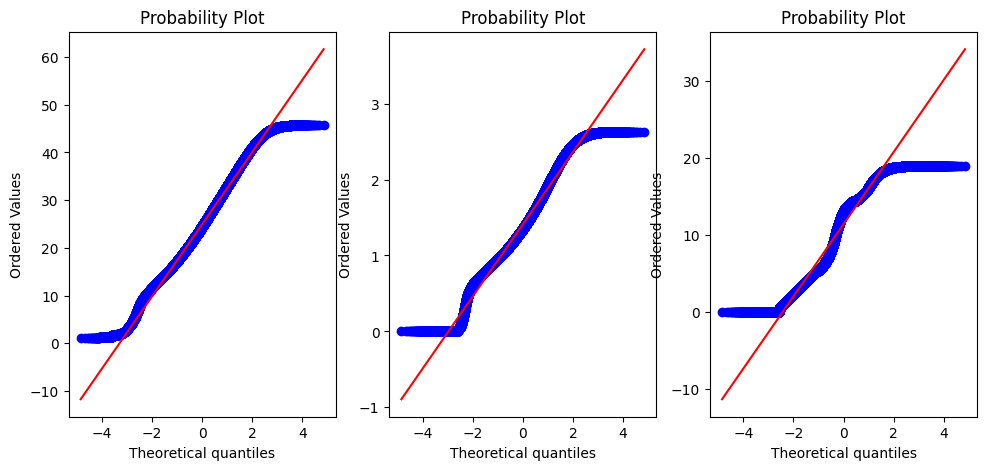

In [ ]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df3,column)
plt.show()

#### Exponential Transformation

After Applying Transformation


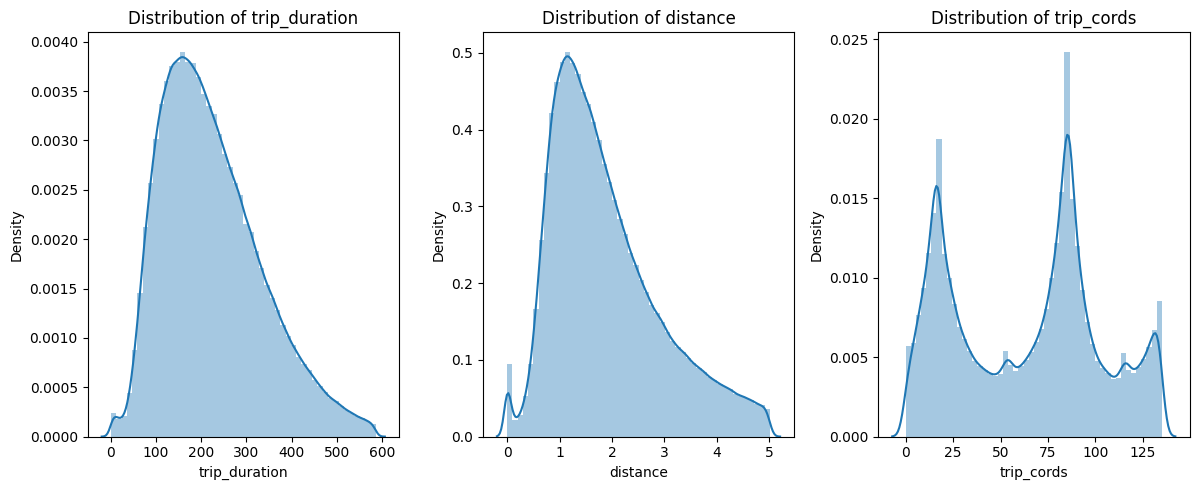

In [ ]:
# Applying transformation on the above considered columns
test_df4['trip_duration']=(test_df4['trip_duration'])**(1/1.2)
test_df4['distance']=(test_df4['distance'])**(1/1.2)
test_df4['trip_cords']=(test_df4['trip_cords'])**(1/1.2)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df4[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: trip_duration
Q-Q Plot for variable: distance
Q-Q Plot for variable: trip_cords


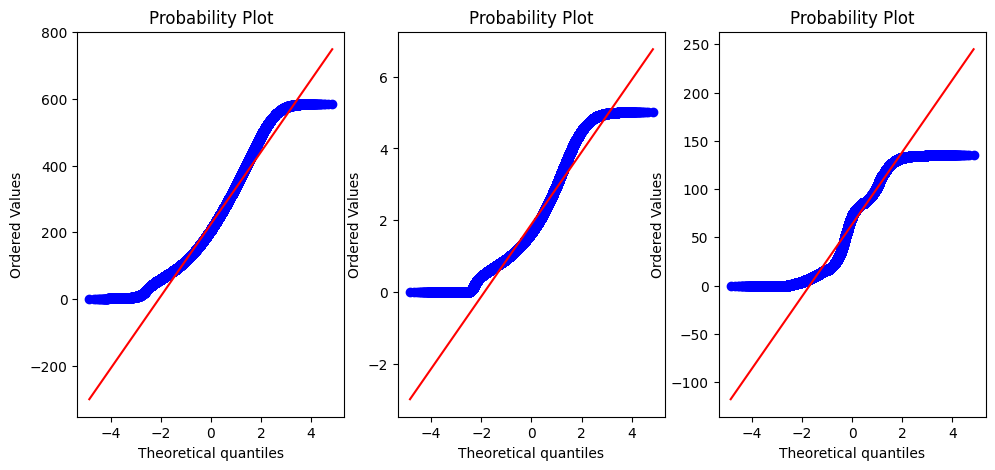

In [ ]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df4,column)
plt.show()

#### Applying Transformation

From the above plots it is clear that:

1. Feature "trip_duration" needs square root transformation.

2. Feature "distance" needs square root transformation.

3. Feature "trip_direction" no transformation needed.

In [ ]:
# Applying transformation on the above considered columns
## Square root transformation
final_df['trip_duration']=(final_df['trip_duration'])**(1/2)
final_df['distance']=(final_df['distance'])**(1/2)


We have successfully transformed our continuous variables, and they now exhibit a normal distribution.

### 6. Data Scaling

Before scalling let's seprate our 'x' and 'y' variables.

In [ ]:
# Separating "x" and "y" variables
x= final_df.drop('trip_duration',axis=1)
y= final_df[['trip_duration']]
print(x.shape)
print(y.shape)

(1106011, 9)
(1106011, 1)


In [ ]:
# Scaling your data

# Creating object
std_regressor= StandardScaler()

# Fit and Transform
x= std_regressor.fit_transform(x)

##### Which method have you used to scale you data and why?

We have employed the StandardScaler from the sklearn library to standardize our data, a critical step to ensure optimal model performance. The standardization process is essential because having features with varying scales can lead to suboptimal results or slow convergence in machine learning models. By standardizing the features, we facilitate their comparison and the evaluation of their influence on the target variable, "trip_duration," by examining the magnitude of their coefficients. Furthermore, this standardization aligns with the assumptions of linear regression models, which assume normally distributed data, thereby enhancing model performance.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

After performing feature selection, feature modeling, and feature engineering, our dataset now contains only a select few independent features. With a dataset size of 12,89,283 records, there are no concerns related to the curse of dimensionality. We have effectively reduced the number of features without compromising the integrity and originality of the data.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(f'The shape of x_train is: {x_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of x_test is: {x_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of x_train is: (884808, 9)
The shape of y_train is: (884808, 1)
The shape of x_test is: (221203, 9)
The shape of y_test is: (221203, 1)


##### What data splitting ratio have you used and why?

We've adopted a data splitting ratio of 80:20, allocating 80% of the dataset to the training set and reserving 20% for the testing set. This partitioning was achieved through the use of the train_test_split function provided by the scikit-learn library. This standard practice in machine learning ensures that the model is exposed to distinct data subsets for training and testing, effectively guarding against overfitting and enhancing the model's ability to generalize to unseen data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

NO

As Handling imbalanced dataset refers to the process of addressing class imbalance in a dataset where one class (minority class) has significantly fewer observations than another class (majority class). This imbalanced distribution of classes can have a negative impact on machine learning algorithms, as they may be biased towards the majority class, leading to poor performance in classifying the minority class.

So we dont need to balance the dataset.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
# Defining the function that calculated regression metrics
def regression_metrics(y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  print("-"*50)
  ## mean_absolute_error
  MAE_train= mean_absolute_error(y_train,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test,y_test_pred)
  print("MAE on test is:" ,MAE_test)

  print("-"*50)

  ## mean_squared_error
  MSE_train= mean_squared_error(y_train, y_train_pred)
  print("MSE on train is:" ,MSE_train)
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is:" ,MSE_test)

  print("-"*50)

  ## root_mean_squared_error
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)

  print("-"*50)

   ## mean_absolute_percentage_error
  MAPE_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
  print("MAPE on train is:" ,MAPE_train, " %")
  MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
  print("MAPE on test is:" ,MAPE_test, " %")


  print("-"*50)

  ## r2_score
  R2_train= r2_score(y_train,y_train_pred)
  print("R2 on train is:" ,R2_train)
  R2_test= r2_score(y_test,y_test_pred)
  print("R2 on test is:" ,R2_test)

  print("-"*50)

  Accuracy_train= 100- MAPE_train
  print("Accuracy of train is:" ,Accuracy_train, " %")
  Accuracy_test= 100- MAPE_test
  print("Accuracy of test is:" ,Accuracy_test, " %")

  print("-"*50)

In [ ]:
# Defining the function that plots Evaluation Metric Score Chart
def EvaluationMetricChart(yt,yp):
   ''' Prints Evaluation Metrics Chart'''
   #Plotting Actual and Predicted Values
   plt.figure(figsize=(18,6))
   plt.plot((yp)[:100])
   plt.plot((np.array(yt)[:100]))
   plt.legend(["Predicted","Actual"])
   plt.title('Actual and Predicted Time Duration')

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
linear_regressor= LinearRegression()
# Fit the Algorithm
linear_regressor.fit(x_train,y_train)
# Predict on the model
y_pred_lr_train = linear_regressor.predict(x_train)
y_pred_lr_test  = linear_regressor.predict(x_test)

In [ ]:
# Checking the coefficients
linear_regressor.coef_

# Checking the intercept
linear_regressor.intercept_

array([24.95374557])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_pred_lr_train,y_test,y_pred_lr_test)

--------------------------------------------------
MAE on train is: 3.950179247690715
MAE on test is: 3.951208487770346
--------------------------------------------------
MSE on train is: 25.77225433895027
MSE on test is: 25.692507180891504
--------------------------------------------------
RMSE on train is: 5.07663809414757
RMSE on test is: 5.0687776811467575
--------------------------------------------------
MAPE on train is: 17.709073833795813  %
MAPE on test is: 17.755341464965806  %
--------------------------------------------------
R2 on train is: 0.5529232557331709
R2 on test is: 0.5543098228178684
--------------------------------------------------
Accuracy of train is: 82.29092616620419  %
Accuracy of test is: 82.24465853503419  %
--------------------------------------------------


In [ ]:
# Visualizing evaluation Metric Score chart

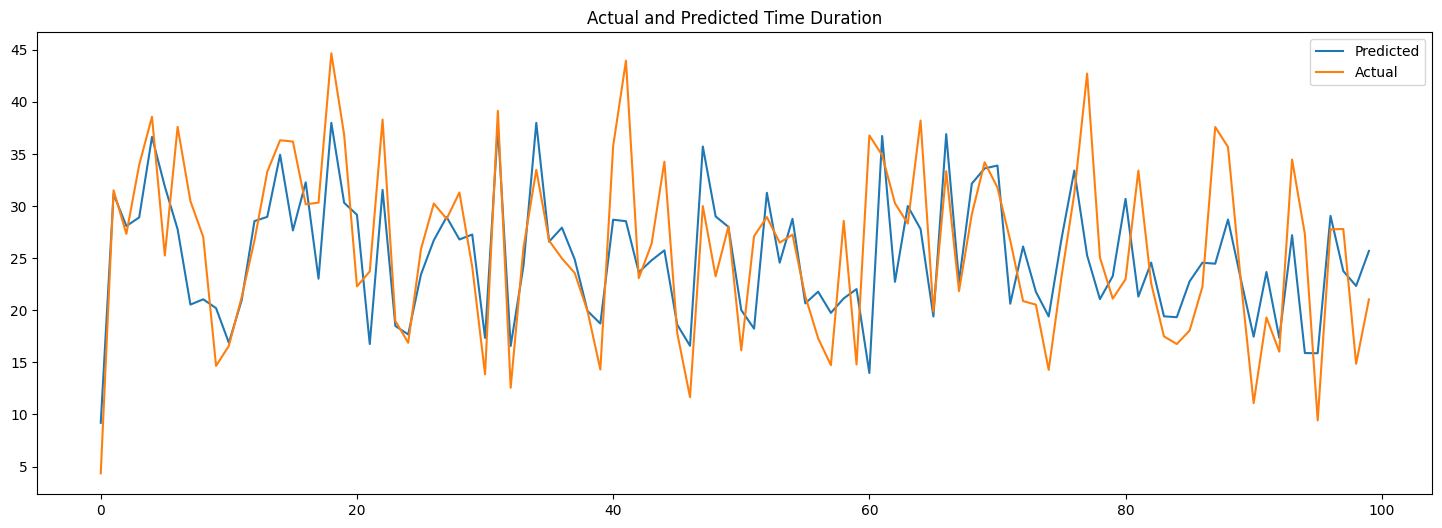

In [ ]:
#Evaluation metrics Chart for Train set
EvaluationMetricChart(y_train,y_pred_lr_train)

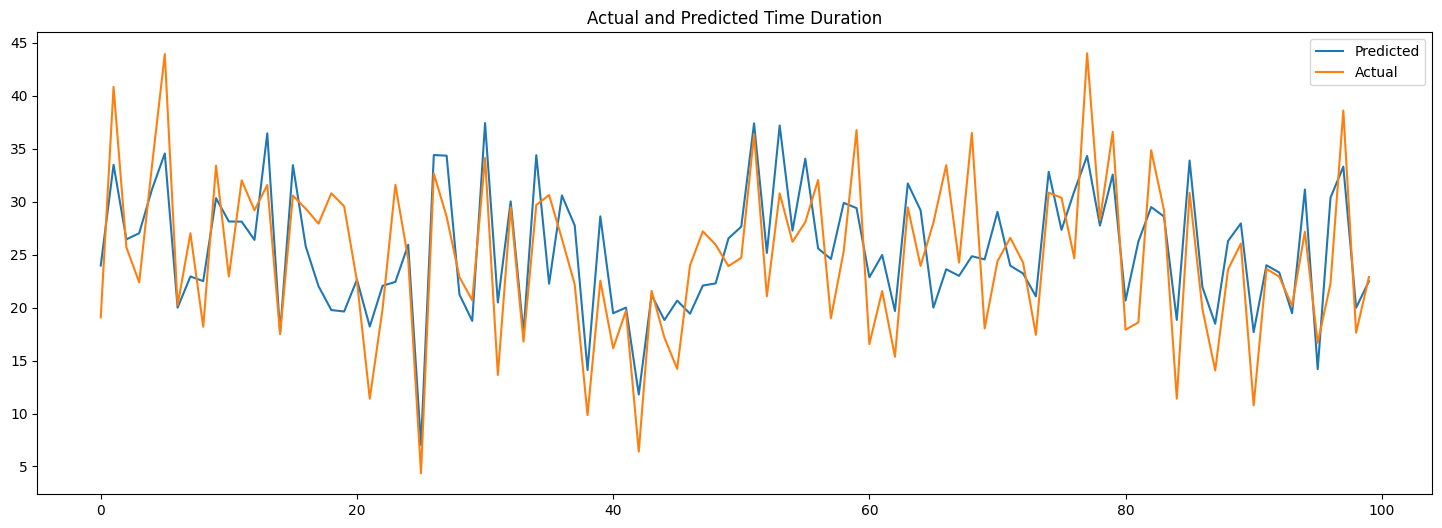

In [ ]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_pred_lr_test)

#### 2. Cross- Validation & Hyperparameter Tuning

We initiated our analysis with a basic and straightforward linear regression model. We conducted an assessment of essential regression metrics on both the training and test datasets to gauge the model's performance. The findings indicate that the r2 scores are consistent, suggesting that the model is making progress.

Nevertheless, it's important to note that the connection between the dependent and independent variables doesn't exhibit a strong linear pattern. To enhance our model's performance, we plan to implement cross-validation and engage in hyperparameter tuning as part of our optimization efforts.
1. Lasso

2. Ridge

3. Elastic Net models

### ML Model - 2

In [ ]:
# Creating Ridge instance
lasso= Lasso()
# Defining parameters
parameters_lasso = {"alpha": [1e-5,1e-4,1e-3,1e-2,1e-1,1,5], "max_iter":[7,8,9,10]}
# Train the model
lassoR = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=5)
lassoR.fit(x_train,y_train)
# Predict the output
y_pred_lasso_train = lassoR.predict(x_train)
y_pred_lasso_test  = lassoR.predict(x_test)
# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lassoR.best_params_}")
print(f"Negative mean square error is: {lassoR.best_score_}")

The best alpha value found out to be: {'alpha': 0.01, 'max_iter': 7}
Negative mean square error is: -25.784812109856244


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_pred_lasso_train,y_test,y_pred_lasso_test)

--------------------------------------------------
MAE on train is: 3.9514142535950754
MAE on test is: 3.9524543096053657
--------------------------------------------------
MSE on train is: 25.77310491169131
MSE on test is: 25.695530869387362
--------------------------------------------------
RMSE on train is: 5.076721866686347
RMSE on test is: 5.069075938411986
--------------------------------------------------
MAPE on train is: 17.724666337379198  %
MAPE on test is: 17.770954198218604  %
--------------------------------------------------
R2 on train is: 0.5529085006680211
R2 on test is: 0.5542573706281317
--------------------------------------------------
Accuracy of train is: 82.2753336626208  %
Accuracy of test is: 82.2290458017814  %
--------------------------------------------------


In [ ]:
# Visualizing evaluation Metric Score chart

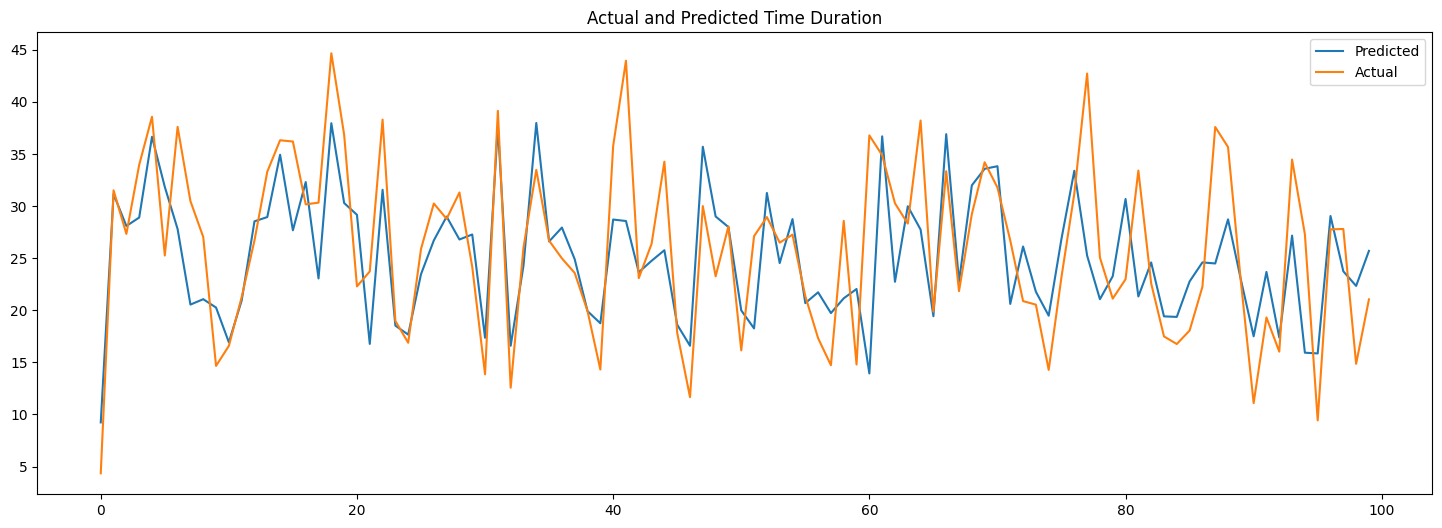

In [ ]:
#Evaluation metrics Chart for Train set
EvaluationMetricChart(y_train,y_pred_lasso_train)

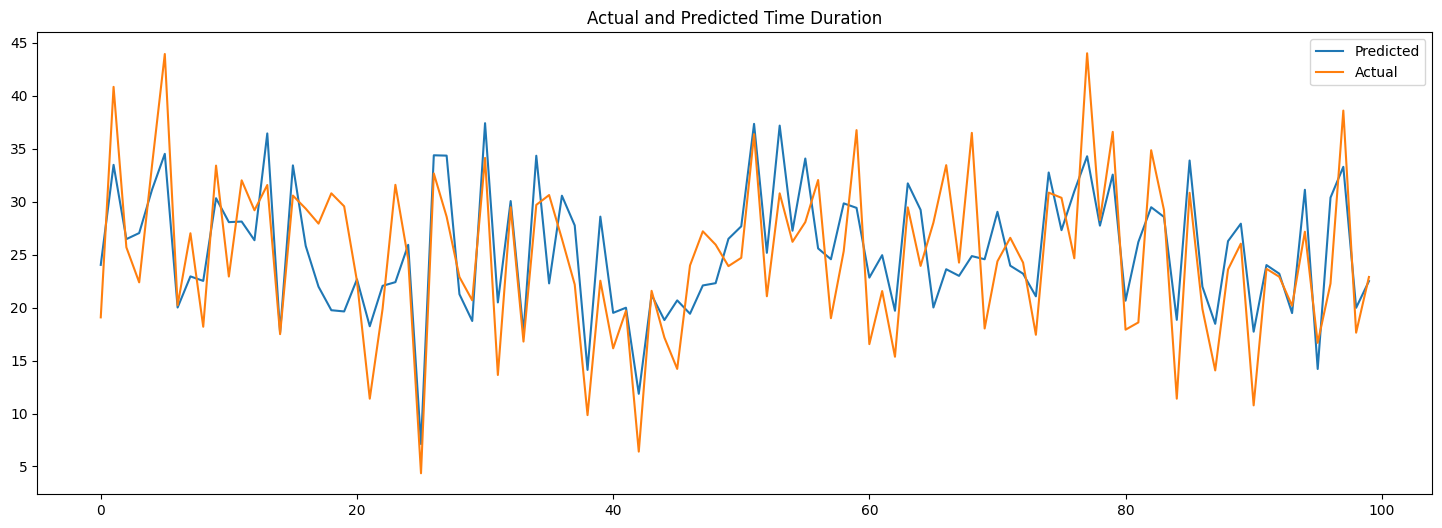

In [ ]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_pred_lasso_test)

### ML Model - 3: Ridge Regression

In [ ]:
# ML Model - 3 Implementation
ridge= Ridge()
# Defining parameters
parameters = {"alpha": [1e-1,1,5,7,10,11,14,15,16,17], "max_iter":[1,2,3]}
# Fit the Algorithm
ridgeR = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridgeR.fit(x_train,y_train)
# Predict on the model
y_pred_ridge_train = ridgeR.predict(x_train)
y_pred_ridge_test = ridgeR.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_pred_ridge_train,y_test,y_pred_ridge_test)

--------------------------------------------------
MAE on train is: 3.9501857088228154
MAE on test is: 3.951214941693739
--------------------------------------------------
MSE on train is: 25.772254351425456
MSE on test is: 25.692507713543108
--------------------------------------------------
RMSE on train is: 5.076638095376255
RMSE on test is: 5.068777733689169
--------------------------------------------------
MAPE on train is: 17.709190704363174  %
MAPE on test is: 17.755458617794165  %
--------------------------------------------------
R2 on train is: 0.5529232555167611
R2 on test is: 0.5543098135779143
--------------------------------------------------
Accuracy of train is: 82.29080929563682  %
Accuracy of test is: 82.24454138220584  %
--------------------------------------------------


In [ ]:
# Visualizing evaluation Metric Score chart

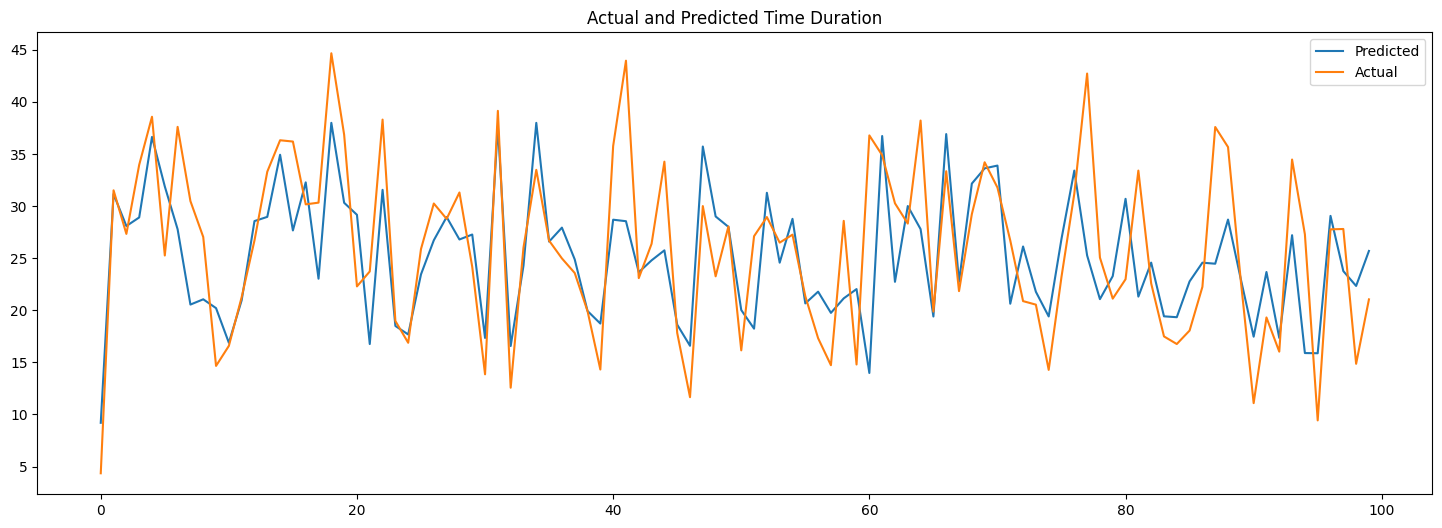

In [ ]:
#Evaluation metrics Chart for Train set
EvaluationMetricChart(y_train,y_pred_ridge_train)

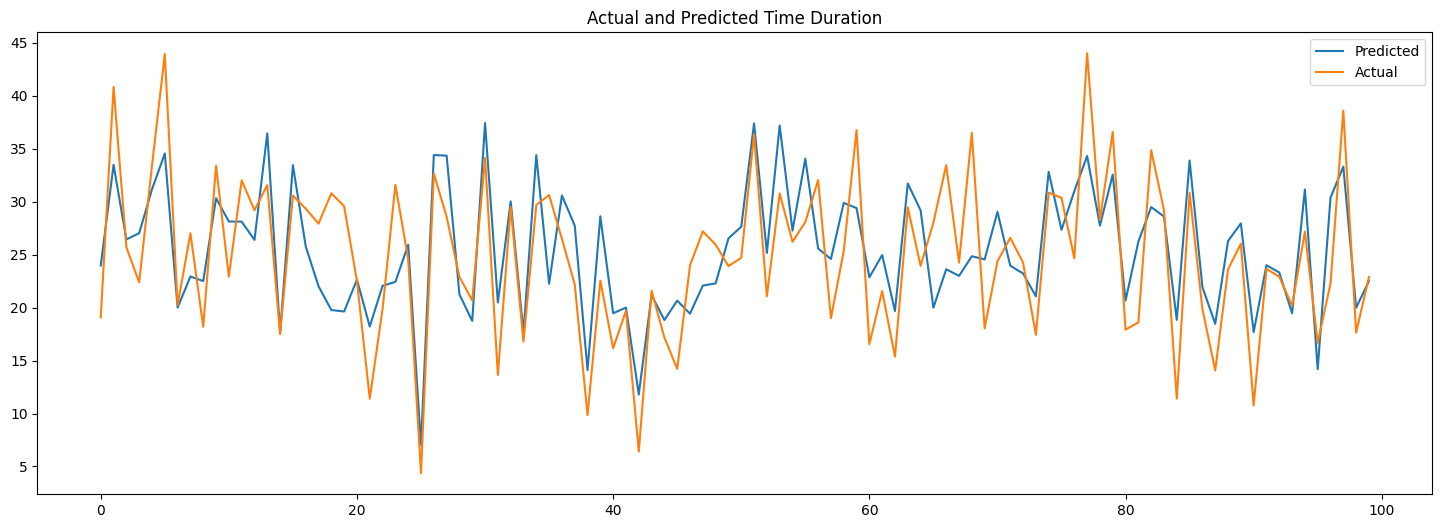

In [ ]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_pred_ridge_test)

### ML Model - 4 Elastic Net Regression

In [ ]:
# ML Model - 4 Implementation
e_net= ElasticNet()
# Defining parameters
parameters_e_net = {"alpha": [1e-5,1e-4,1e-3,1e-2,1,5], "max_iter":[12,13,14,15]}

# Train the model
e_netR = GridSearchCV(e_net, parameters_e_net, scoring='neg_mean_squared_error', cv=5)
e_netR.fit(x_train,y_train)

# Predict on the model
y_pred_e_net_train = e_netR.predict(x_train)
y_pred_e_net_test = e_netR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {e_netR.best_params_}")
print(f"Negative mean square error is: {e_netR.best_score_}")

The best alpha value found out to be: {'alpha': 0.001, 'max_iter': 12}
Negative mean square error is: -25.785978666418032


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_pred_e_net_train,y_test,y_pred_e_net_test)

--------------------------------------------------
MAE on train is: 3.950407121793576
MAE on test is: 3.9514369092354555
--------------------------------------------------
MSE on train is: 25.77226881351261
MSE on test is: 25.692648078180127
--------------------------------------------------
RMSE on train is: 5.076639519752472
RMSE on test is: 5.0687915796746
--------------------------------------------------
MAPE on train is: 17.712884665433158  %
MAPE on test is: 17.759161652972935  %
--------------------------------------------------
R2 on train is: 0.552923004639878
R2 on test is: 0.5543073786602357
--------------------------------------------------
Accuracy of train is: 82.28711533456683  %
Accuracy of test is: 82.24083834702706  %
--------------------------------------------------


In [ ]:
# Visualizing evaluation Metric Score chart

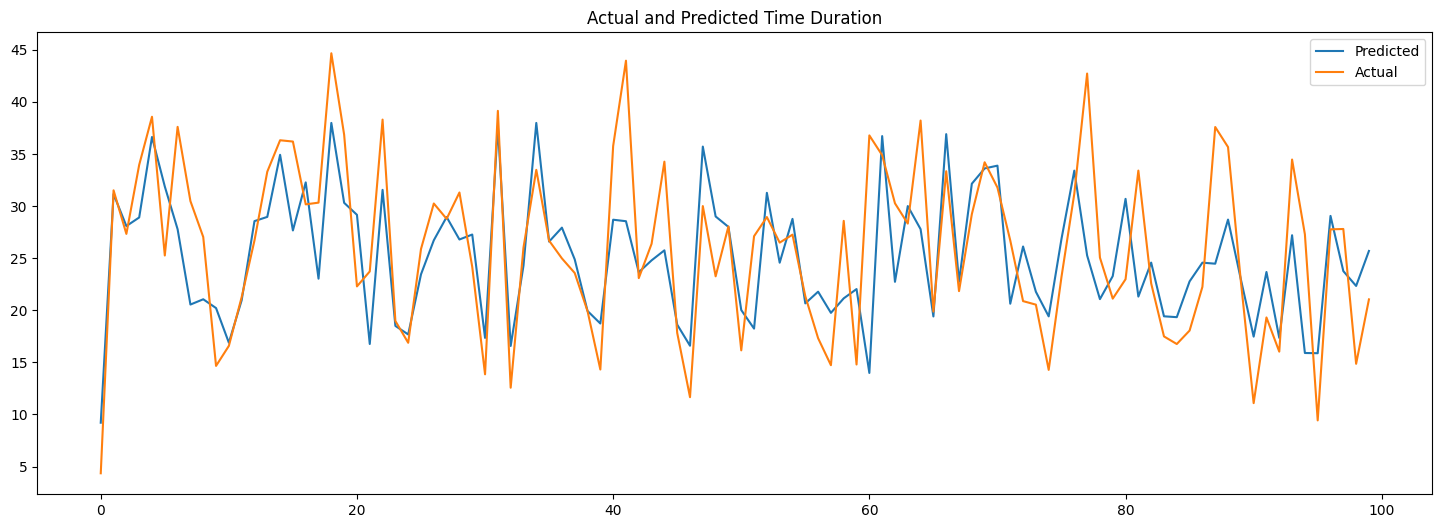

In [ ]:
#Evaluation metrics Chart for Train set
EvaluationMetricChart(y_train,y_pred_e_net_train)

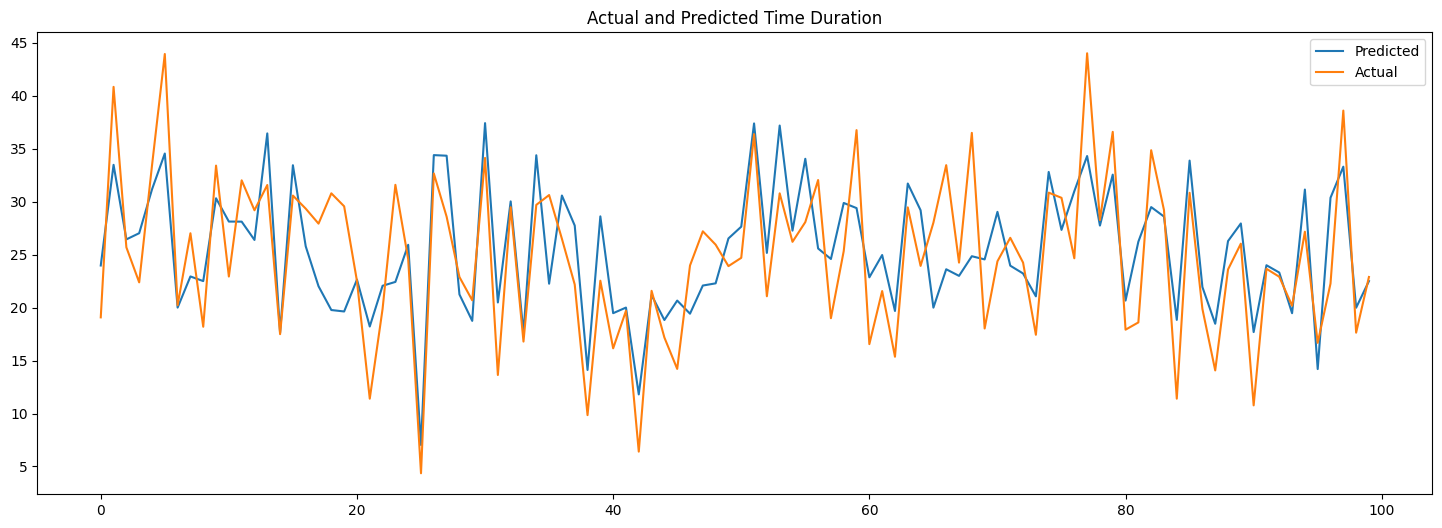

In [ ]:
#Evaluation metrics Chart for Test set
EvaluationMetricChart(y_test,y_pred_e_net_test)

#### 1. Which hyperparameter optimization technique have you used and why?

GridSearchCV is utilized for hyperparameter tuning as it tests all possible hyperparameter combinations and calculates their performance. The best set of hyperparameters is then selected based on this performance evaluation, offering a highly accurate tuning method.

#### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Despite attempting to improve our model's performance using Lasso, Ridge, and Elastic Net, we were unable to see a substantial improvement in the R2 score, MSE, and MAPE. This led us to explore more advanced machine learning models, such as Decision Trees, Random Forest, XGBoost Regression, and LightGBM Regression, in order to achieve better results.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The aim of evaluating an ML model is to assess the precision of the predictions. To this end, we utilized various evaluation metrics, including r2 score, MSE, and MAPE, to gauge the closeness of the predicted values to the actual values. Our results showed that the model was performing well with minimal difference between the train and test data. This suggests that the model was able to accurately predict the trip durations with an accuracy of approximately 82.25%. This level of accuracy is deemed satisfactory in the context of predicting the dependent variable, which is the trip duration, and its impact on the business.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Predicting trip duration is typically treated as a regression problem, where the objective is to forecast a continuous outcome variable (i.e., the duration of a trip) based on one or more predictor variables. This task can also be viewed as a time series problem, given that trip durations may be influenced by temporal factors like time of day, day of the week, and weather conditions. In such cases, the dataset would encompass information on trip duration and related predictor variables collected over a period of time.

* **Mean Absolute Error (MAE)**: MAE serves as a metric for assessing prediction accuracy by calculating the average absolute magnitude of errors in predictions, regardless of whether they are overestimations or underestimations. In regression analysis, the objective is to minimize MAE, leading to enhanced accuracy and positive business outcomes.

* **Mean Squared Error (MSE)**: This metric quantifies the average squared difference between actual and predicted values, offering a numerical representation of the average error in a model's predictions. MSE is commonly employed as a loss function during the training of machine learning models, with the goal of minimizing this value to achieve a more accurate model.

* **Root Mean Squared Error (RMSE)**: RMSE is a widely used evaluation metric for regression models. It is computed as the square root of the Mean Squared Error. RMSE has the same units as the original data, making it easier to interpret the magnitude of prediction errors.

* **R2 Score**: The R2 Score, or coefficient of determination, is a frequently used metric in regression analysis. It assesses the proportion of the variance in the dependent variable that can be explained by the independent variables included in the model. R2 Score provides insights into model fit and enables comparisons, aiding in model selection and analysis decisions.

* **Mean Absolute Percentage Error (MAPE)**: MAPE is a metric commonly employed in time series analysis to evaluate prediction accuracy. It is calculated as the average of the absolute percentage differences between actual and predicted values. MAPE is valuable for understanding the percentage error in predictions and is considered a crucial regression metric for time series data due to its potential positive impact on business decisions.

* **Accuracy**: Accuracy is calculated as the average of the absolute percentage differences between actual and predicted values. A lower value of 100 minus MAPE indicates a more accurate model, suggesting a higher degree of similarity between the actual and predicted values.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

 The goal is to predict a continuous value like trip duration, then the RMSE is a more appropriate evaluation metric, since it provides a measure of the magnitude of the error in the predictions. The smaller the RMSE, the better the model is at predicting the actual values.

 Hence we are going to select our Ridge Regression model.

In [ ]:
# Comparing the evaluation metrics of different Model

# Storing different regression metrics in order to make dataframe
Models   = ["Linear Regression","Lasso Regression","Ridgde Regression",
            "Elastic Net Regression"]
MAE =  [3.951,3.952,3.951,3.951]
MSE =  [25.692,25.695,25.692,25.692]
RMSE = [5.068,5.069,5.068,5.068]
MAPE = [17.753,17.770,17.554,17.759]
r2 =   [0.554,0.554,0.544,0.554]
accuracy = [82.244,82.229,82.244,82.240]
# Create dataframe from the lists
data = {'MODEL': Models,
          'MAE': MAE,
          'MSE': MSE,
         'RMSE': RMSE,
         'MAPE': MAPE,
           'R2': r2,
     'Accuracy': accuracy}

Metric_df = pd.DataFrame(data)

# Printing dataframe
Metric_df

MODEL  MAE   MSE  RMSE  MAPE   R2  Accuracy
0       Linear Regression 3.95 25.69  5.07 17.75 0.55     82.24
1        Lasso Regression 3.95 25.70  5.07 17.77 0.55     82.23
2       Ridgde Regression 3.95 25.69  5.07 17.55 0.54     82.24
3  Elastic Net Regression 3.95 25.69  5.07 17.76 0.55     82.24

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Linear Ridge Regression is an extension of linear regression that addresses issues like overfitting and multicollinearity. It accomplishes this by introducing a regularization term (L2 regularization) into the linear regression model. This term penalizes large coefficient values, encouraging the model to find a balance between fitting the data and keeping the coefficients small. This is valuable in situations where there are many features or when these features are highly correlated. Linear Ridge Regression helps create more stable and generalizable models by preventing extreme coefficient values.

Featuere Explainability

In [ ]:
final_df_copy = final_df.copy()

# Drop the 'trip_duration' column from the copy
final_df_copy.drop('trip_duration', axis=1, inplace=True)

# Get the list of remaining columns in the copy
features_columns = final_df_copy.columns.tolist()

importance_df= pd.DataFrame({'Features': ['vendor_id_1','passenger_count_1','pickup_longitude','dropoff_latitude','flag_Y','weekday_num','pickup_hour', 'trip_cords','distance'] ,'Feature_importance':[-0.03020274, -0.09239027, -0.07626592, -0.28747029,  0.01742051,-0.40848007,  0.27976788,  0.50693228,  5.64256423]})
importance_df





Features  Feature_importance
0        vendor_id_1               -0.03
1  passenger_count_1               -0.09
2   pickup_longitude               -0.08
3   dropoff_latitude               -0.29
4             flag_Y                0.02
5        weekday_num               -0.41
6        pickup_hour                0.28
7         trip_cords                0.51
8           distance                5.64

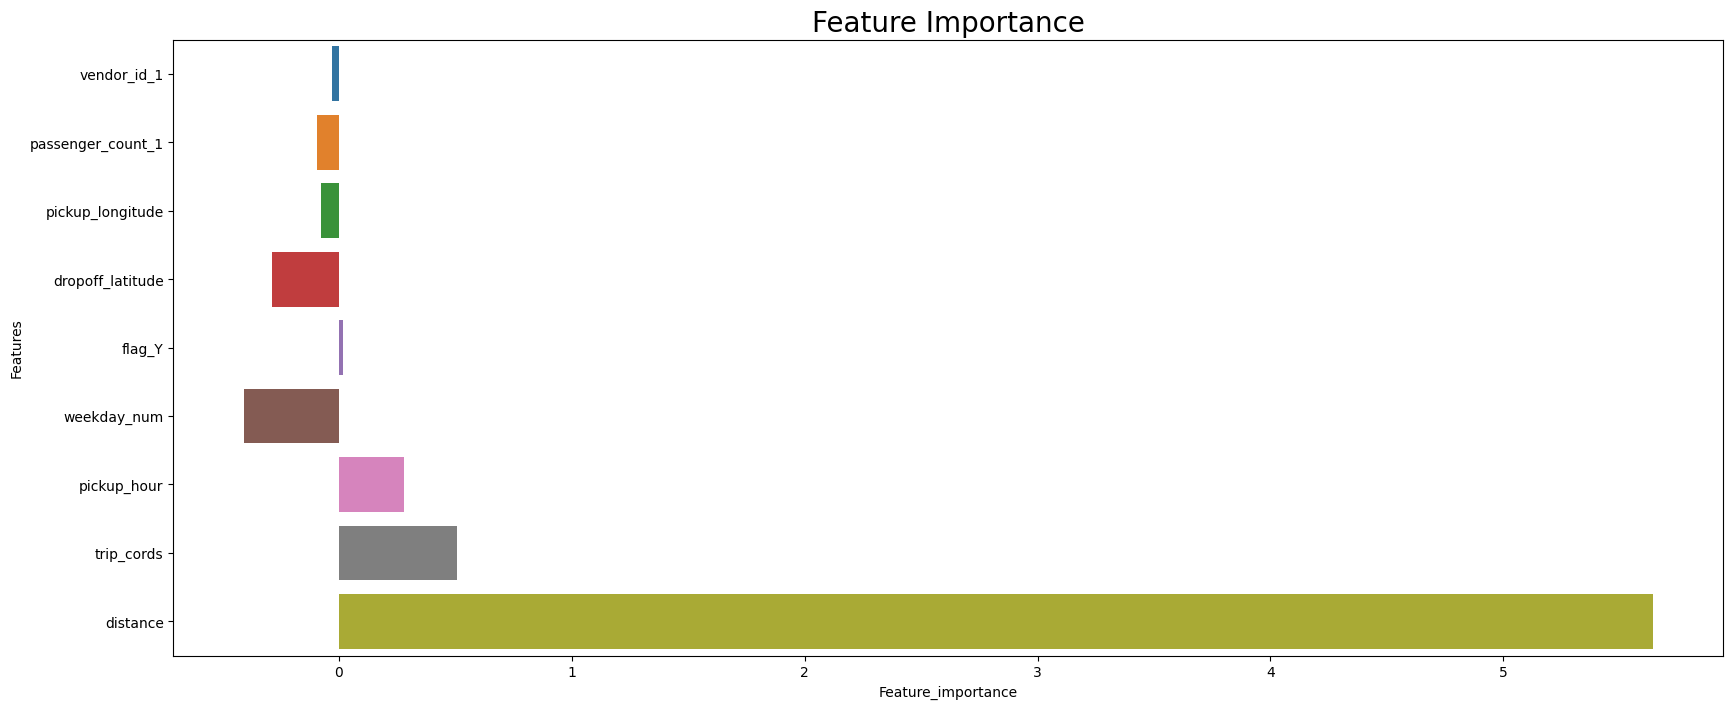

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Feature Importance', fontsize=20)
sns.barplot(x="Feature_importance",y='Features', data=importance_df, orient = 'h')
plt.show()

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

## **From EDA**


**Key Findings from EDA**:

1. Vendor 2 is slightly more popular than Vendor 1, both serving a similar number of trips.

2. The majority of trips have 1 or 2 passengers, and trip durations typically fall within the 10-20 minute range.

3. On average, trips cover a distance of 3.5 km, with the longest distances traveled on Sundays.

4. Overall trip demand remains stable throughout the year.

5. Average trip duration is shortest at 6 AM and peaks during rush hours at 3 PM.

6. Trip duration increases from Monday to Thursday but decreases towards the weekend (Sunday).

7. The month of June sees the highest average trip duration, while February has the lowest.

8. Vendor 2 tends to have an average trip duration approximately 200 seconds longer than Vendor 1.

9. Trips during the early morning hours tend to cover the greatest distances.

10. Taxis tend to travel at higher average speeds during weekends, with the peak occurring at 5 AM.

11. Vendor 2 typically accommodates a higher average passenger count compared to Vendor 1.

12. Pick-up locations are concentrated in Manhattan, while drop-off locations are more evenly spread out.



From Machine Learning

Our Linear Regression model achieved an accuracy of approximately 82.24%, however, it only captured 55% of the variance in the target variable (trip_duration). This suggests that the relationship between the features and the target is not a perfect linear dependence, even after using regularization techniques.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***